In [8]:
import pandas as pd
file_path = "Observations 2012-2025.xlsx"
df = pd.read_excel(file_path)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Aigrette bleue    86 non-null     object
 1   Egretta caerulea  86 non-null     object
 2   Migrateur         85 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


## NOM FRANCAIS

In [10]:
# 定义完整的列名列表
column_names = [
    'Nom_observateur',
    'code_departement', 
    'Nom_transect',
    'date',
    'passage',  # 1er, 2e ou 3e passage
    'nuages',
    'pluie', 
    'vent',
    'visibilite',
    'N_point',
    'heure_debut',
    'ESPECE',
    'dist_25m_Auditif',
    'dist_25m_Visuel',
    'dist_50m_Auditif', 
    'dist_50m_Visuel',
    'dist_100m_Auditif',
    'dist_100m_Visuel',
    'dist_plus100m_Auditif',
    'dist_plus100m_Visuel',
    'vol',
    'total_Auditif',
    'total_Visuel_sans_vol',
    'total_AV_sans_vol',
    'total_AV_avec_vol'
]

In [11]:
obs_data = pd.read_excel(
    file_path,
    sheet_name='NOM FRANÇAIS',
    header=None,      
    skiprows=3,       
    names=column_names,
    index_col=False
)

In [12]:
obs_data.shape

(114495, 25)

In [13]:
obs_data.head()

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_50m_Visuel,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol
0,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0
1,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,1.0
2,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2,2.0
3,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0
4,BELFAN David,972.0,Fond l'Etang,2014-04-12 00:00:00,1,2,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1,1.0


## ESPECES

In [14]:
# ESPECES表的列名定义
species_column_names = [
    'nom_francais',     # 法语名称 
    'nom_scientifique', # 学名 
    'statut_migratoire' # 迁徙状态 
]

# 读取ESPECES工作表
species_data = pd.read_excel(file_path, sheet_name='ESPECES', header=0, names=species_column_names)

species_data.head()

,nom_francais,nom_scientifique,statut_migratoire
0,Aigrette garzette,Egretta garzetta,Migrateur
1,Aigrette neigeuse,Egretta thula,Migrateur
2,Aigrette tricolore,Egretta tricolor ruficollis,Migrateur
3,Amazone aourou,Amazona amazonica,Exogène introduit par l'homme
4,Astrild à joues orange,Estrilda melpoda,NaN


## GPS-MILIEU

In [15]:
# GPS-MILIEU表的列名定义
site_column_names = [
    'transect_name',    # 样线名称 (如 Aéroport)
    'utm_x',           # UTM X坐标 (如 714593)
    'utm_y',           # UTM Y坐标 (如 1614233)
    'habitat_type',    # 栖息地类型 (如 Mangrove)
    'site_id',         # 站点ID (如 S1)
    'point_id'         # 点位ID (如 SIPI, S1P2)
]

In [16]:
site_data = pd.read_excel(file_path, sheet_name='GPS-MILIEU',skiprows=2, names=site_column_names)

In [17]:
site_data.head()

,transect_name,utm_x,utm_y,habitat_type,site_id,point_id
0,Aéroport,714416,1614194,Mangrove,S1,S1P2
1,Aéroport,714133,1614141,Mangrove,S1,S1P3
2,Aéroport,713914,1614103,Mangrove,S1,S1P4
3,Aéroport,713719,1614062,Mangrove,S1,S1P5
4,Aéroport,713559,1614036,Mangrove,S1,S1P6


## 1.1 Overview of the dataset structure

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========== 1. Load and inspect dataset ==========
# 读取观测数据
# obs_data = pd.read_excel(
#     file_path,
#     sheet_name='NOM FRANÇAIS',
#     header=2,
#     names=column_names,
#     index_col=None
# ).dropna(axis=1, how='all')  # 删除空白列

# 打印基本结构信息（表格维度、列名等）
print("=== Dataset Overview ===")
print(f"Shape (rows, columns): {obs_data.shape}")
# print(f"Columns: {list(obs_data.columns)}")

# 检查时间范围
obs_data['date'] = pd.to_datetime(obs_data['date'], errors='coerce')
time_min, time_max = obs_data['date'].min(), obs_data['date'].max()
print(f"Date range: {time_min.date()} to {time_max.date()}")

# 唯一标识符统计（样线、观察者、物种）
unique_transects = obs_data['Nom_transect'].nunique()
unique_observers = obs_data['Nom_observateur'].nunique()
unique_species = obs_data['ESPECE'].nunique()
print(f"Unique transects: {unique_transects}")
print(f"Unique observers: {unique_observers}")
print(f"Unique species: {unique_species}")



=== Dataset Overview ===
Shape (rows, columns): (114495, 25)
Date range: 2014-03-29 to 2025-07-03
Unique transects: 74
Unique observers: 49
Unique species: 103


## 1.2. Observation effort overview 努力量


## Calculate and visualise observation effort over time and across transects.
## 计算并可视化时间和样线维度上的观测努力量

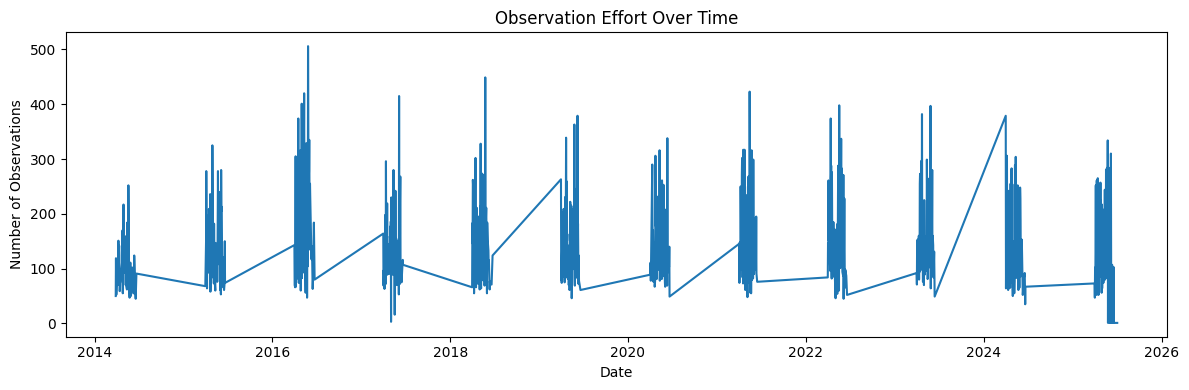

In [19]:
# 2.1 Effort over time (number of observations per day)
# 时间维度上的努力量（每日观测记录数）
effort_by_date = obs_data.groupby('date').size().reset_index(name='n_observations')

plt.figure(figsize=(12, 4))
sns.lineplot(data=effort_by_date, x='date', y='n_observations')
plt.title("Observation Effort Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Observations")
plt.tight_layout()
plt.show()

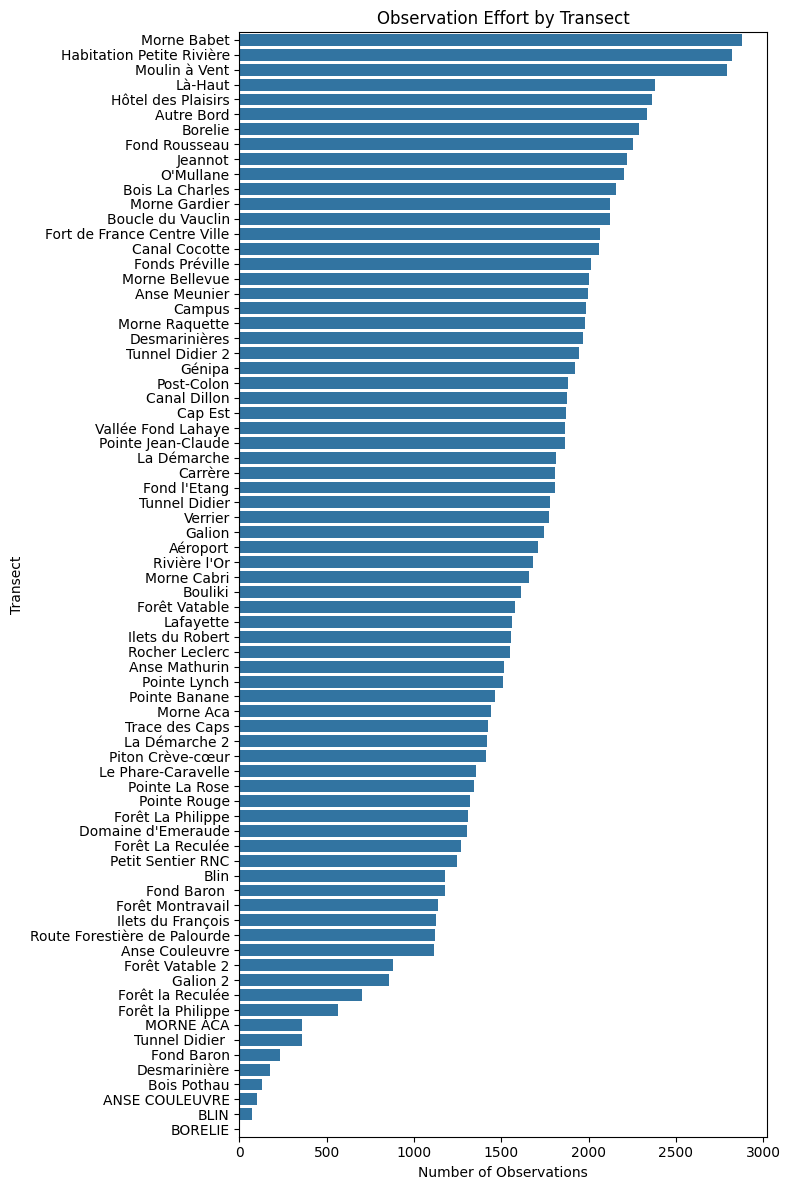

In [20]:
# 2.2 Effort by transect (number of observations per transect)
# 样线维度上的努力量（每条样线观测记录数）
effort_by_transect = obs_data.groupby('Nom_transect').size().sort_values(ascending=False)

plt.figure(figsize=(8, 12))
sns.barplot(x=effort_by_transect.values, y=effort_by_transect.index)
plt.title("Observation Effort by Transect")
plt.xlabel("Number of Observations")
plt.ylabel("Transect")
plt.tight_layout()
plt.show()

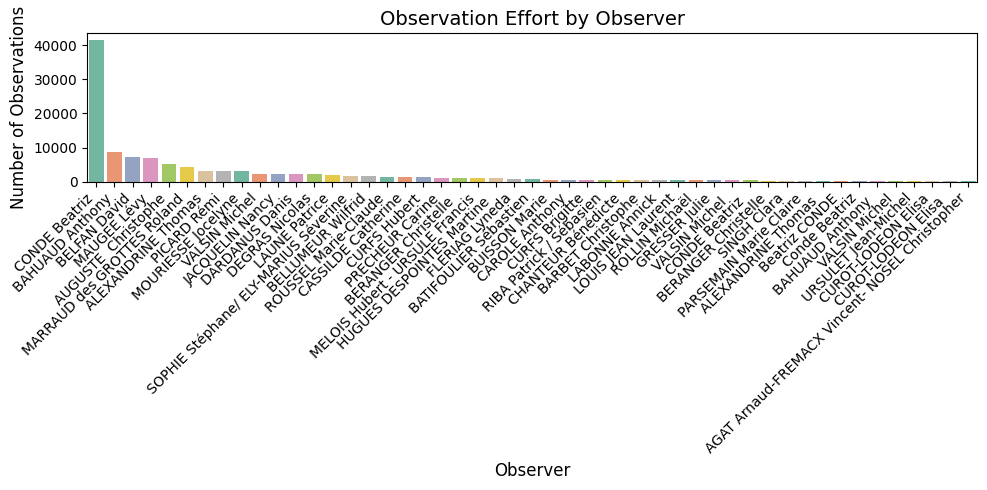

In [21]:
# 2.3 Effort by observer
# 观察者努力量 / 每位观察者观测次数

# 计算每位观察者的观测次数 / Count observations per observer
effort_by_observer = obs_data['Nom_observateur'].value_counts()

# 将 Series 转为 DataFrame / Convert Series to DataFrame
observer_df = effort_by_observer.reset_index()
observer_df.columns = ['Observer', 'Count']

plt.figure(figsize=(10, 5))
sns.barplot(
    x='Observer',
    y='Count',
    data=observer_df,
    hue='Observer',   # 使用 hue 兼容 seaborn 未来版本
    dodge=False,      # 不拆分箱体
    palette="Set2",
    legend=False      # 隐藏图例
)
plt.title("Observation Effort by Observer", fontsize=14)
plt.xlabel("Observer", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# ## 3. Distribution of species counts
# ## 3. 物种计数分布
# Descriptive statistics for numeric variables related to counts.
# 对计数相关的数值列进行描述性统计

# %%
# Define numeric columns
# 定义数值列 / numeric columns for counts
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Convert numeric columns
# 转换为数值类型 / convert to numeric
obs_data[count_cols] = obs_data[count_cols].apply(pd.to_numeric, errors='coerce')

# Summary statistics
# 数值列描述性统计 / descriptive statistics
count_summary = obs_data[count_cols].describe().T
print("=== Descriptive Statistics for Counts===")
count_summary


=== Descriptive Statistics for Counts===


,count,mean,std,min,25%,50%,75%,max
dist_25m_Auditif,58829.0,1.619694,0.960943,0.000000,1.0,1.0,2.0,40.0
dist_25m_Visuel,39190.0,2.011687,2.567085,0.000000,1.0,1.0,2.0,121.0
dist_50m_Auditif,31148.0,1.298831,0.681653,0.000000,1.0,1.0,1.0,23.0
dist_50m_Visuel,5432.0,2.051178,3.573717,0.000000,1.0,1.0,2.0,100.0
dist_100m_Auditif,8402.0,1.235777,0.667929,0.000000,1.0,1.0,1.0,22.0
dist_100m_Visuel,1531.0,1.951012,4.316356,0.000000,1.0,1.0,2.0,150.0
dist_plus100m_Auditif,2648.0,1.305136,3.979901,0.000000,1.0,1.0,1.0,200.0
dist_plus100m_Visuel,1388.0,4.189481,12.844451,0.000000,1.0,1.0,3.0,200.0
vol,1821.0,1.983526,4.056436,0.000000,1.0,1.0,2.0,80.0
total_Auditif,114255.0,1.305836,1.339722,0.000000,1.0,1.0,2.0,200.0


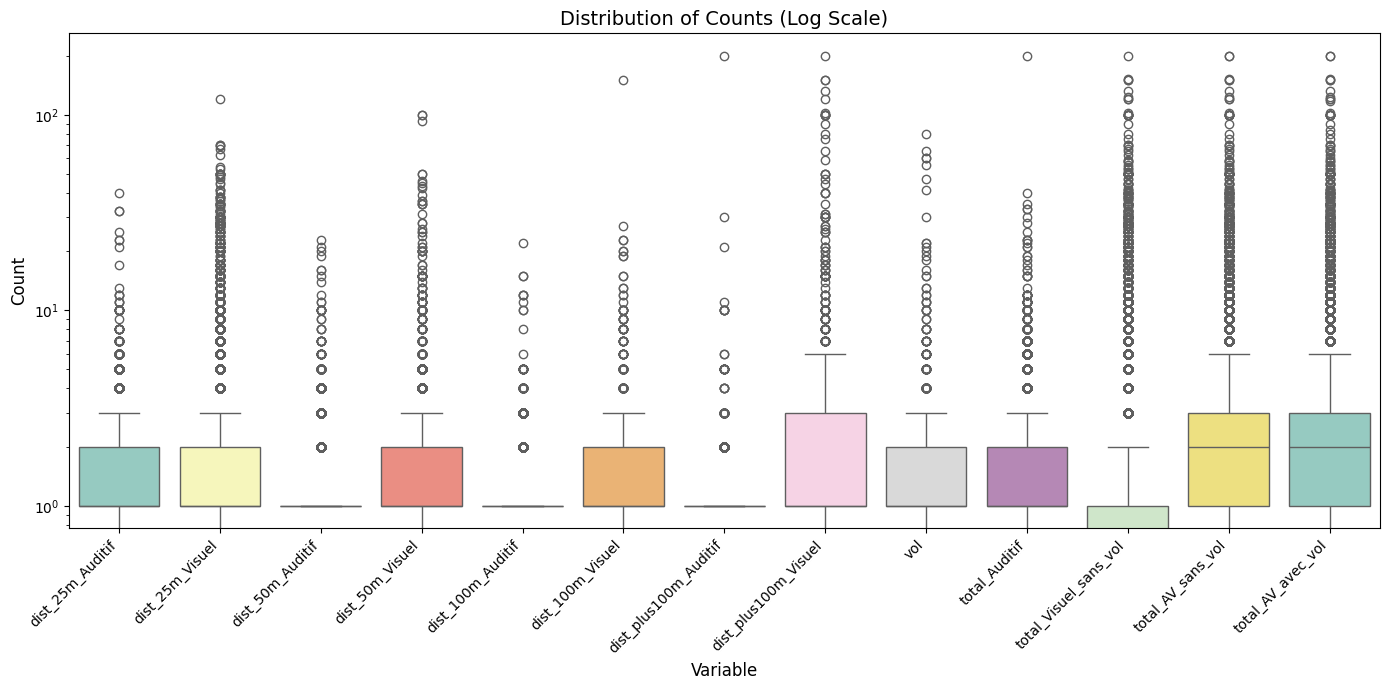

In [23]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

In [24]:
# ## 4. Weather conditions
# ## 4. 天气条件
# Distribution of environmental descriptors such as clouds, rain, wind, and visibility.
# 天气相关变量（云量、降雨、风力、能见度）的分布

# %%
# Convert weather columns to numeric
# 转换为数值类型 / convert to numeric
weather_cols = ['nuages', 'pluie', 'vent', 'visibilite']
obs_data[weather_cols] = obs_data[weather_cols].apply(pd.to_numeric, errors='coerce')


# Summary statistics
# 描述性统计 / descriptive statistics
weather_summary = obs_data[weather_cols].describe().T
print("=== Weather Conditions Summary / 天气条件描述性统计 ===")
weather_summary

=== Weather Conditions Summary / 天气条件描述性统计 ===


,count,mean,std,min,25%,50%,75%,max
nuages,114493.0,1.968181,0.698651,1.0,1.0,2.0,2.0,3.0
pluie,114494.0,1.029355,0.177576,1.0,1.0,1.0,1.0,3.0
vent,114478.0,1.422885,0.600866,-5.0,1.0,1.0,2.0,3.0
visibilite,114494.0,1.419559,0.619856,1.0,1.0,1.0,2.0,4.0


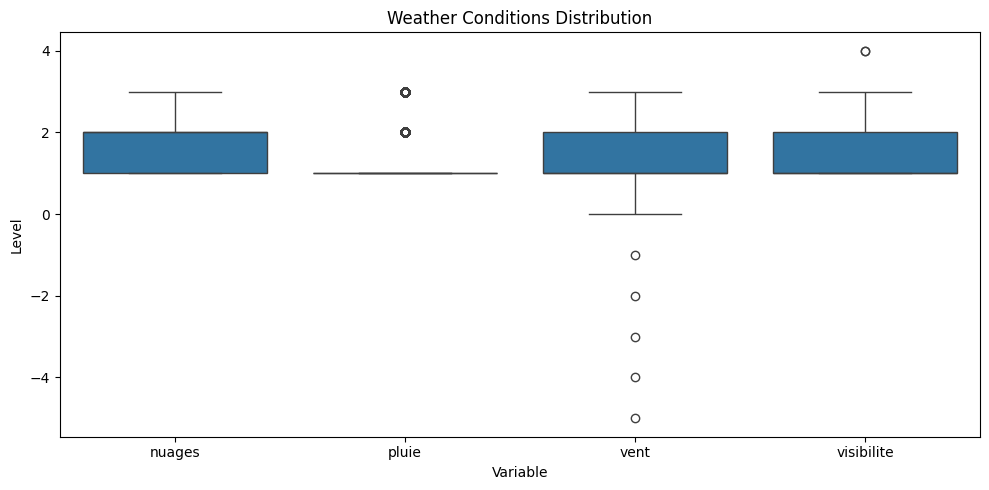

In [25]:
# Boxplot for weather variables
# 天气条件箱线图 / boxplot
plt.figure(figsize=(10, 5))
melted_weather = obs_data[weather_cols].melt(var_name='Variable', value_name='Level')
sns.boxplot(x='Variable', y='Level', data=melted_weather)
plt.title("Weather Conditions Distribution")
plt.ylabel("Level")
plt.xlabel("Variable")
plt.tight_layout()
plt.show()

In [26]:
# ## 5. Data Quality Check
# ## 5. 数据质量检查
# Check missing values, negative counts, and duplicates.

# %%
# 5.1 Missing values
# 缺失值 / missing value ratio
missing_pct = obs_data.isnull().mean().sort_values(ascending=False) * 100
# 每列缺失值比例
print("=== Missing value ratio per column (%)===")
print(missing_pct)


=== Missing value ratio per column (%)===
dist_plus100m_Visuel     98.787720
dist_100m_Visuel         98.662824
vol                      98.409538
dist_plus100m_Auditif    97.687235
dist_50m_Visuel          95.255688
dist_100m_Auditif        92.661688
dist_50m_Auditif         72.795319
dist_25m_Visuel          65.771431
dist_25m_Auditif         48.618717
total_Auditif             0.209616
vent                      0.014848
total_AV_sans_vol         0.005240
total_Visuel_sans_vol     0.003494
code_departement          0.001747
nuages                    0.001747
pluie                     0.000873
visibilite                0.000873
date                      0.000000
Nom_transect              0.000000
passage                   0.000000
Nom_observateur           0.000000
heure_debut               0.000000
N_point                   0.000000
ESPECE                    0.000000
total_AV_avec_vol         0.000000
dtype: float64


In [27]:
# 5.2 Negative values
# 负数检测 / check for negative counts
abnormal_counts = {}
for col in count_cols:
    n_neg = (obs_data[col] < 0).sum()
    if n_neg > 0:
        abnormal_counts[col] = n_neg
if abnormal_counts:
    print("Negative values found in columns：", abnormal_counts)
else:
    print("No negative values detected in count columns")


Negative values found in columns： {'total_Visuel_sans_vol': np.int64(4)}


In [28]:
# 5.3 Duplicate entries
# 重复记录 / duplicates
duplicates = obs_data.duplicated(subset=['Nom_transect', 'date', 'N_point', 'ESPECE']).sum()
# 重复记录数
print(f"Duplicate records: {duplicates}")

Duplicate records: 3005


In [29]:
obs_data.duplicated().sum()

np.int64(2243)

In [30]:
obs_data

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_50m_Visuel,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol
0,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0
1,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0
2,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,2.0,2.0
3,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0
4,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114490,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,2.0
114491,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,1.0
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,2.0
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,NaN,2.0,NaN,NaN,NaN,NaN,3.0,0.0,3.0,3.0


# Data Preprocessing / 数据预处理
# Clean and prepare the observation dataset before analysis
# 对观测数据进行清理和预处理，为后续分析做准备

In [31]:
import pandas as pd
import numpy as np

# %% [markdown]
# ## 1. Ensure date column is datetime / 确保日期列为 datetime 类型

# %%
obs_data_cleaned = obs_data.copy()  # Copy original data / 复制原始数据
obs_data_cleaned['date'] = pd.to_datetime(obs_data_cleaned['date'], errors='coerce')
print(f"Missing dates : {obs_data_cleaned['date'].isna().sum()}")

# %% [markdown]
# ## 2. Convert numeric columns / 转换数值列为数值型

# %%
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Convert to numeric, coerce errors to NaN / 转换为数值型，无法转换的设为 NaN
obs_data_cleaned[count_cols] = obs_data_cleaned[count_cols].apply(pd.to_numeric, errors='coerce')

# Check missing values / 检查缺失值
missing_counts = obs_data_cleaned[count_cols].isna().sum()
print("Missing values in count columns :\n", missing_counts)



Missing dates : 0
Missing values in count columns :
 dist_25m_Auditif          55666
dist_25m_Visuel           75305
dist_50m_Auditif          83347
dist_50m_Visuel          109063
dist_100m_Auditif        106093
dist_100m_Visuel         112964
dist_plus100m_Auditif    111847
dist_plus100m_Visuel     113107
vol                      112674
total_Auditif               240
total_Visuel_sans_vol         4
total_AV_sans_vol             6
total_AV_avec_vol             0
dtype: int64


In [32]:
# %% [markdown]
# ## 3. Handle missing values / 处理缺失值

# %%
# Remove rows with missing key information (date, transect, point) / 删除关键列缺失行
obs_data_cleaned = obs_data_cleaned.dropna(subset=['date', 'Nom_transect', 'N_point'])

# Fill missing numeric counts with 0 / 数值列缺失值填充为0
obs_data_cleaned[count_cols] = obs_data_cleaned[count_cols].fillna(0)

obs_data_cleaned

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_50m_Visuel,dist_100m_Auditif,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol
0,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
3,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114490,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0
114491,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0


In [33]:
obs_data_cleaned[count_cols].isna().sum()

dist_25m_Auditif         0
dist_25m_Visuel          0
dist_50m_Auditif         0
dist_50m_Visuel          0
dist_100m_Auditif        0
dist_100m_Visuel         0
dist_plus100m_Auditif    0
dist_plus100m_Visuel     0
vol                      0
total_Auditif            0
total_Visuel_sans_vol    0
total_AV_sans_vol        0
total_AV_avec_vol        0
dtype: int64

In [34]:
# %% [markdown]
# ## 4. Remove duplicate records / 删除重复记录

# %%
# Identify duplicates based on transect, date, point, and species / 基于样线、日期、点位、物种和第几次巡查/观测判断重复
obs_data_cleaned.duplicated(subset=['Nom_transect','date','N_point','ESPECE','passage'])
print(f"Number of duplicate rows : {duplicates.sum()}")

# 检查整行是否重复 / Check full row duplicates
full_duplicates = obs_data_cleaned.duplicated()  # 不指定 subset，比较整行
print(f"Number of full duplicate rows : {full_duplicates.sum()}")

Number of duplicate rows : 3005
Number of full duplicate rows : 2243


In [35]:
# 删除整行重复 / Remove full row duplicates
obs_data_cleaned = obs_data_cleaned.drop_duplicates()

In [36]:
obs_data_cleaned.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
114490    False
114491    False
114492    False
114493    False
114494    False
Length: 112252, dtype: bool

In [37]:
# %% [markdown]
# ## 6. Create auxiliary columns / 创建辅助列

# %%
# Extract year and month / 提取年份和月份
# 使用 .loc 显式赋值 / Use .loc to avoid SettingWithCopyWarning
obs_data_cleaned.loc[:, 'year'] = obs_data_cleaned['date'].dt.year
obs_data_cleaned.loc[:, 'month'] = obs_data_cleaned['date'].dt.month

/tmp/ipykernel_50463/1931325623.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_data_cleaned.loc[:, 'year'] = obs_data_cleaned['date'].dt.year
/tmp/ipykernel_50463/1931325623.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obs_data_cleaned.loc[:, 'month'] = obs_data_cleaned['date'].dt.month


In [38]:
obs_data_cleaned

,Nom_observateur,code_departement,Nom_transect,date,passage,nuages,pluie,vent,visibilite,N_point,...,dist_100m_Visuel,dist_plus100m_Auditif,dist_plus100m_Visuel,vol,total_Auditif,total_Visuel_sans_vol,total_AV_sans_vol,total_AV_avec_vol,year,month
0,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
1,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2014,4
2,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2014,4
3,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
4,BELFAN David,972.0,Fond l'Etang,2014-04-12,1,2.0,1.0,1.0,1.0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114490,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2025,5
114491,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2025,5
114492,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0,2025,5
114493,MAUGEE Lévy,972.0,Post-Colon,2025-05-01,1,2.0,1.0,1.0,1.0,10,...,0.0,0.0,0.0,0.0,3.0,0.0,3.0,3.0,2025,5


## 处理天气异常值

/tmp/ipykernel_50463/724009599.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


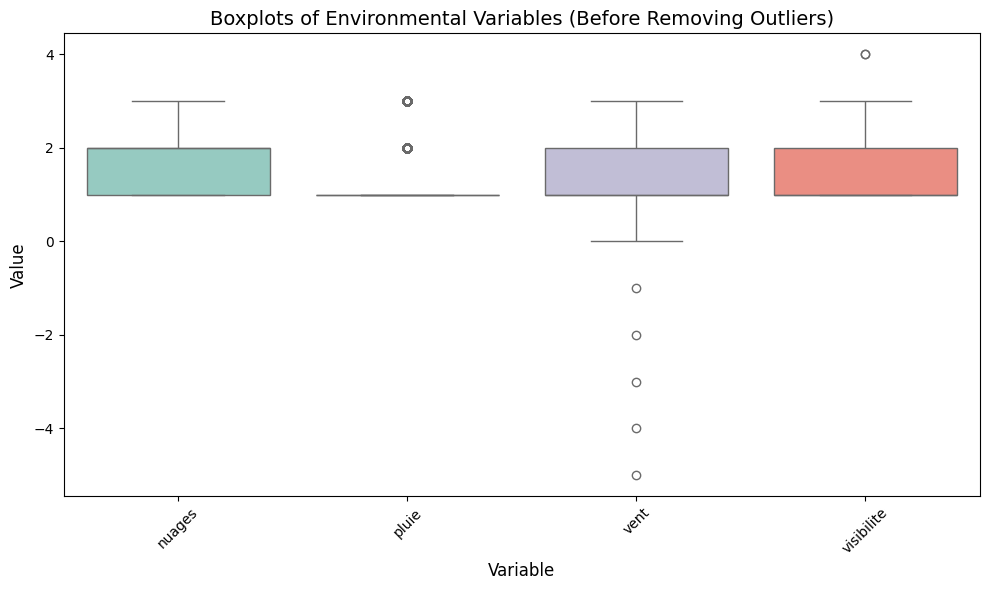

In [39]:
# %% [markdown]
# ## Boxplots of environmental variables / 环境变量箱线图（未删除异常值）
# Visualize distributions of nuages, pluie, vent, visibilite / 可视化云量、降雨、风力、能见度分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Melt dataframe for plotting / 转成长表便于绘图
plot_data = obs_data_cleaned[env_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data,
    palette="Set3"
)
plt.title("Boxplots of Environmental Variables (Before Removing Outliers)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# %% [markdown]
# ## Remove outliers in environmental columns / 删除环境列中的异常值
# Use IQR method to filter extreme values / 使用 IQR 方法过滤极端值

# %%
# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Copy the DataFrame to avoid modifying original / 复制一份数据
obs_data_no_outliers = obs_data_cleaned.copy()

for col in env_cols:
    # Convert to numeric in case of strings / 转为数值型
    obs_data_no_outliers[col] = pd.to_numeric(obs_data_no_outliers[col], errors='coerce')
    
    # Calculate Q1, Q3 and IQR / 计算四分位数和 IQR
    Q1 = obs_data_no_outliers[col].quantile(0.25)
    Q3 = obs_data_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds / 定义上下界
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers / 删除异常值
    obs_data_no_outliers = obs_data_no_outliers[
        (obs_data_no_outliers[col] >= lower_bound) & (obs_data_no_outliers[col] <= upper_bound)
    ]

# %% [markdown]
# ## Check results / 检查处理后的数据
print("Shape after removing environmental outliers / 删除异常值后数据维度:", obs_data_no_outliers.shape)
print("Remaining environmental data ranges / 剩余环境列范围:")
print(obs_data_no_outliers[env_cols].describe())

Shape after removing environmental outliers / 删除异常值后数据维度: (109139, 27)
Remaining environmental data ranges / 剩余环境列范围:
              nuages     pluie           vent     visibilite
count  109139.000000  109139.0  109139.000000  109139.000000
mean        1.950018       1.0       1.423130       1.400581
std         0.693046       0.0       0.598472       0.604930
min         1.000000       1.0       1.000000       1.000000
25%         1.000000       1.0       1.000000       1.000000
50%         2.000000       1.0       1.000000       1.000000
75%         2.000000       1.0       2.000000       2.000000
max         3.000000       1.0       3.000000       3.000000


/tmp/ipykernel_50463/4288950723.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


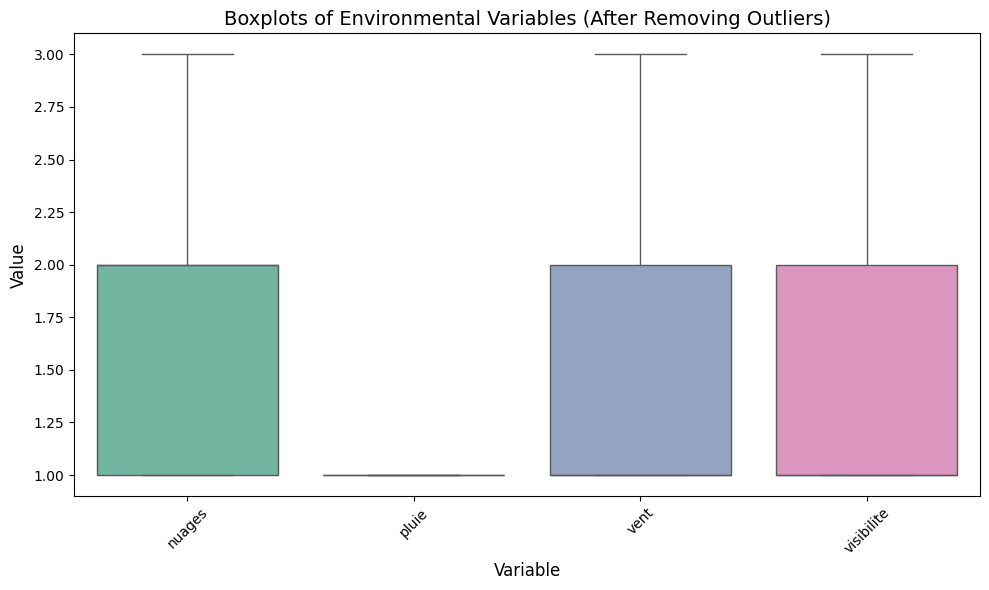

In [41]:
# %% [markdown]
# ## Boxplots of environmental variables after removing outliers / 删除异常值后的环境变量箱线图
# Visualize distributions after outlier removal / 删除异常值后可视化环境列分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# List of environmental columns / 环境列
env_cols = ['nuages', 'pluie', 'vent', 'visibilite']

# Melt dataframe for plotting / 转成长表便于绘图
plot_data_after = obs_data_no_outliers[env_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data_after,
    palette="Set2"
)
plt.title("Boxplots of Environmental Variables (After Removing Outliers)", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 计数异常值处理

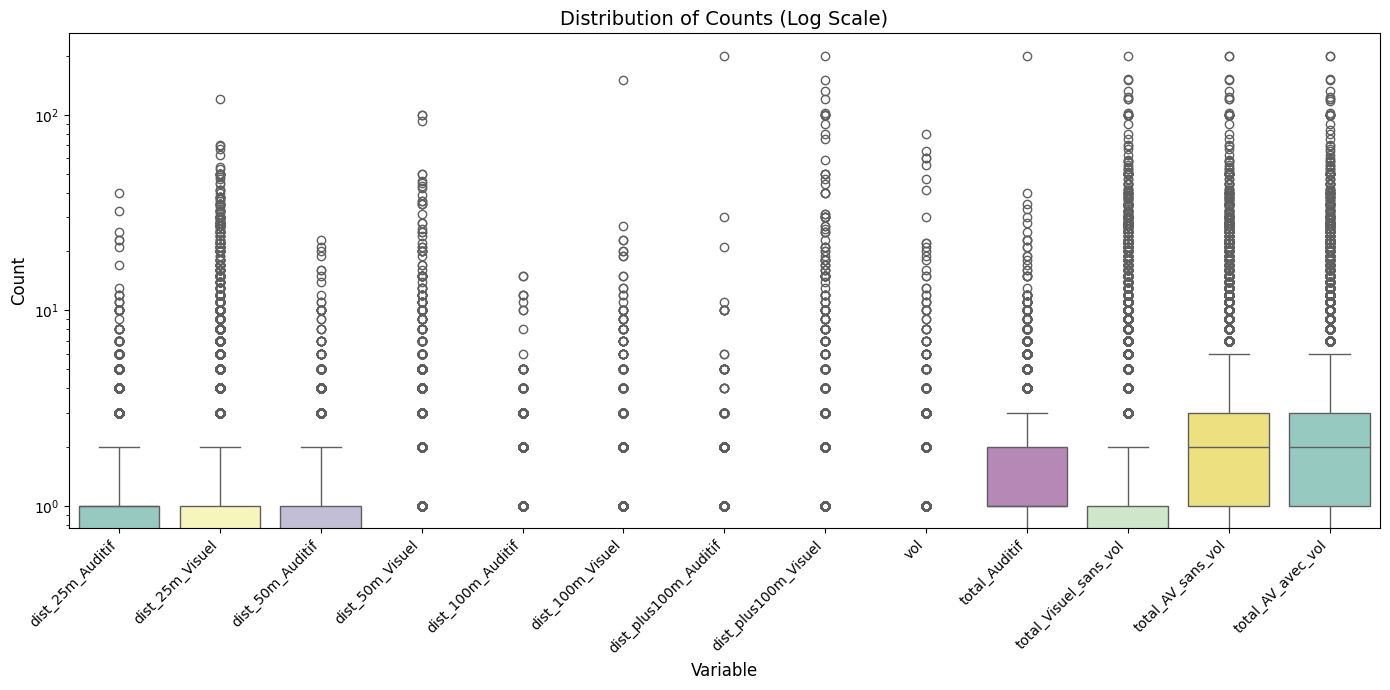

In [42]:
# %% [markdown]
# ## 3. Improved Distribution of Species Counts
# ## 3. 改进版物种计数分布
# Boxplot with log scale and outliers highlighted for better visualisation.
# 带对数刻度和异常值的箱线图，更清晰展示各计数变量分布

# %%
plt.figure(figsize=(14, 7))

# Melt dataframe for plotting
# 将宽表转成长表 / convert wide to long format
melted_counts = obs_data_no_outliers[count_cols].melt(var_name='Variable', value_name='Value')

# Draw boxplot
# 绘制箱线图 / boxplot
sns.boxplot(
    x='Variable',
    y='Value',
    data=melted_counts,
    hue='Variable',       # 使用 hue 指定颜色
    palette="Set3",
    showfliers=True,
    dodge=False,          # 合并箱体，避免重复
    legend=False          # 不显示图例
)

# Set log scale for y-axis
# y轴对数刻度 / log scale
plt.yscale('log')

# Rotate x-axis labels for readability
# 旋转 x 轴标签 / rotate labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Titles and labels
plt.title("Distribution of Counts (Log Scale)", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipykernel_50463/4048201009.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


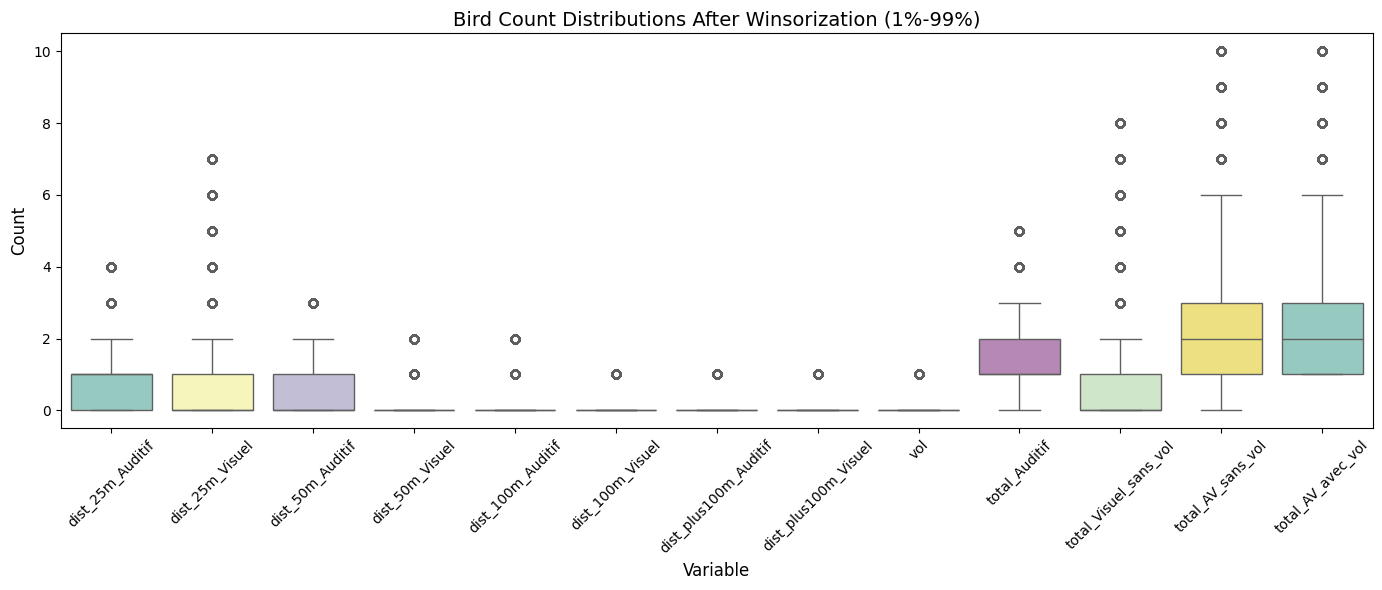

In [43]:
# %% [markdown]
# ## Winsorize bird count columns / 对鸟类计数列进行上下 1% 分位数裁剪
# 将低于 1% 的值设为 1% 分位数，将高于 99% 的值设为 99% 分位数

# %%
import numpy as np

# List of bird count columns / 鸟类计数列
count_cols = [
    'dist_25m_Auditif', 'dist_25m_Visuel',
    'dist_50m_Auditif', 'dist_50m_Visuel',
    'dist_100m_Auditif', 'dist_100m_Visuel',
    'dist_plus100m_Auditif', 'dist_plus100m_Visuel',
    'vol', 'total_Auditif', 'total_Visuel_sans_vol',
    'total_AV_sans_vol', 'total_AV_avec_vol'
]

# Copy DataFrame / 复制数据
# obs_data_winsor = obs_data_cleaned.copy()
obs_data_winsor = obs_data_no_outliers.copy()

# Apply winsorization / 上下分位数裁剪
for col in count_cols:
    lower = obs_data_winsor[col].quantile(0.01)  # 1% 分位数
    upper = obs_data_winsor[col].quantile(0.99)  # 99% 分位数
    obs_data_winsor[col] = obs_data_winsor[col].clip(lower, upper)  # 裁剪

# %% [markdown]
# ## Boxplots after winsorization / 上下1%分位数裁剪后的箱线图
# Visualize bird count distributions / 可视化鸟类计数分布

# %%
import seaborn as sns
import matplotlib.pyplot as plt

# Melt dataframe for plotting / 转成长表
plot_data = obs_data_winsor[count_cols].melt(var_name='Variable', value_name='Value')

# Plot boxplots / 绘制箱线图
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data,
    palette="Set3"
)
plt.title("Bird Count Distributions After Winsorization (1%-99%)", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Variable", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

删除异常值后剩余数据量: 106756 条记录


/tmp/ipykernel_50463/4079144230.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_50463/4079144230.py:48: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_50463/4079144230.py:48: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_50463/4079144230.py:48: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_50463/4079144230.py:48: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_50463/4079144230.py:48: UserWarning: Glyph 21024 (\N{CJK UNIFIED IDEOGRAPH-5220}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tm

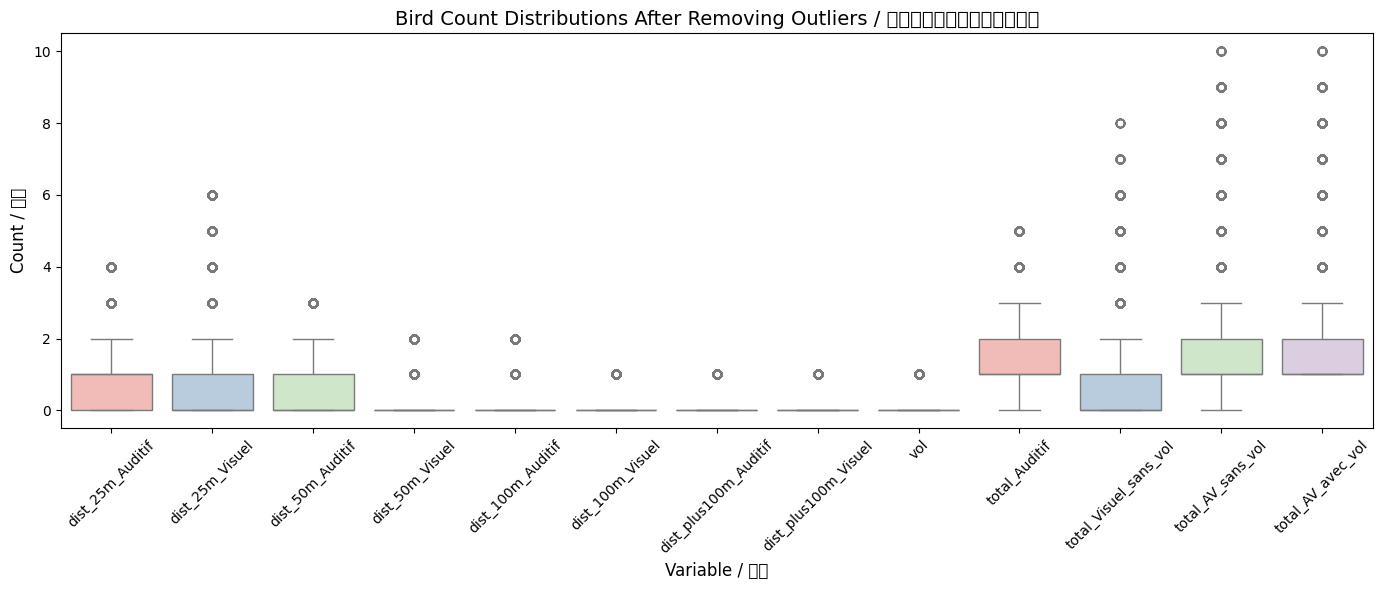

In [44]:
# %% [markdown]
# ## Remove extreme outliers / 删除极端异常值
# 删除所有鸟类计数中任意列低于1%或高于99%分位数的行

# %%
# 复制数据
obs_data_no_outliers = obs_data_cleaned.copy()

# 计算各列的分位数阈值
thresholds = {}
for col in count_cols:
    lower = obs_data_no_outliers[col].quantile(0.01)
    upper = obs_data_no_outliers[col].quantile(0.99)
    thresholds[col] = (lower, upper)

# 逐列筛选，删除超出范围的记录
for col, (lower, upper) in thresholds.items():
    obs_data_no_outliers = obs_data_no_outliers[
        (obs_data_no_outliers[col] >= lower) &
        (obs_data_no_outliers[col] <= upper)
    ]

# 打印删除后的结果
print(f"删除异常值后剩余数据量: {len(obs_data_no_outliers)} 条记录")

# %% [markdown]
# ## Boxplots after removing outliers / 删除异常值后的箱线图

# %%
# 将删除异常值后的数据转成长表
plot_data_no_outliers = obs_data_no_outliers[count_cols].melt(
    var_name='Variable',
    value_name='Value'
)

# 绘制箱线图
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='Variable',
    y='Value',
    data=plot_data_no_outliers,
    palette="Pastel1"
)
plt.title("Bird Count Distributions After Removing Outliers / 删除异常值后的鸟类计数分布", fontsize=14)
plt.ylabel("Count / 计数", fontsize=12)
plt.xlabel("Variable / 变量", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

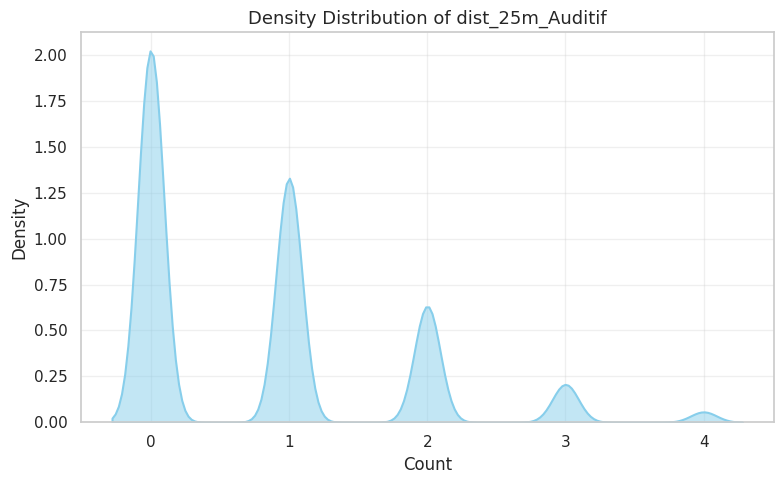

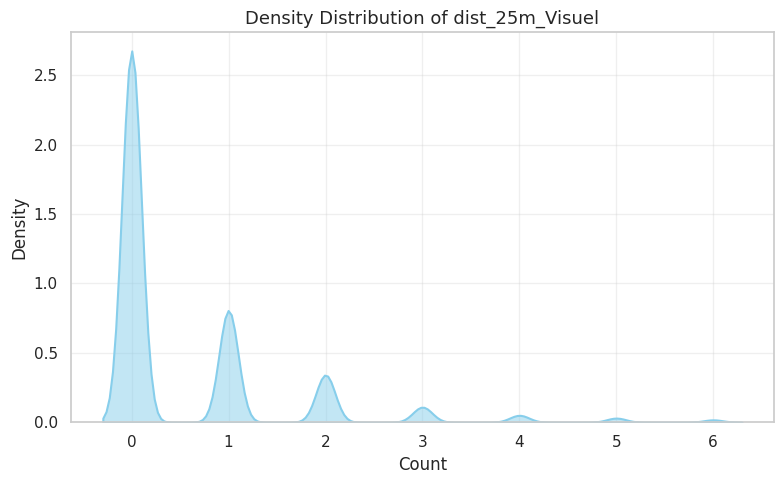

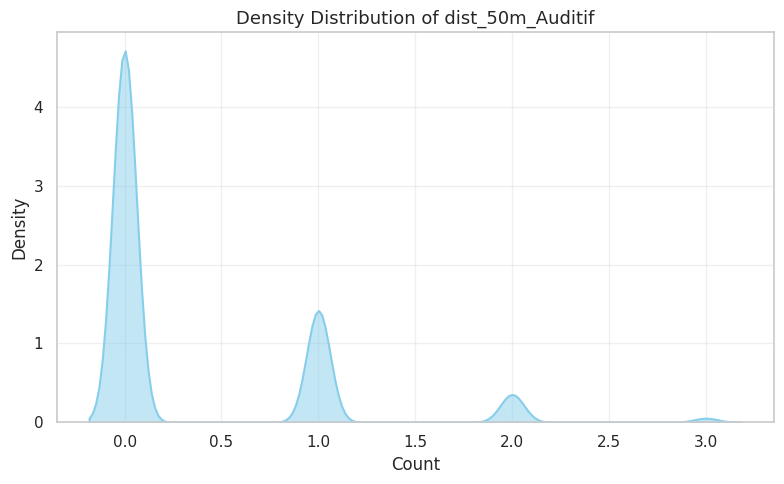

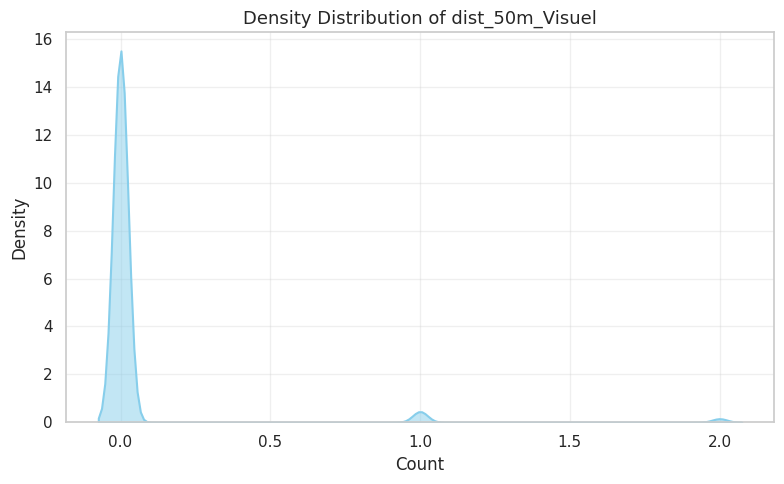

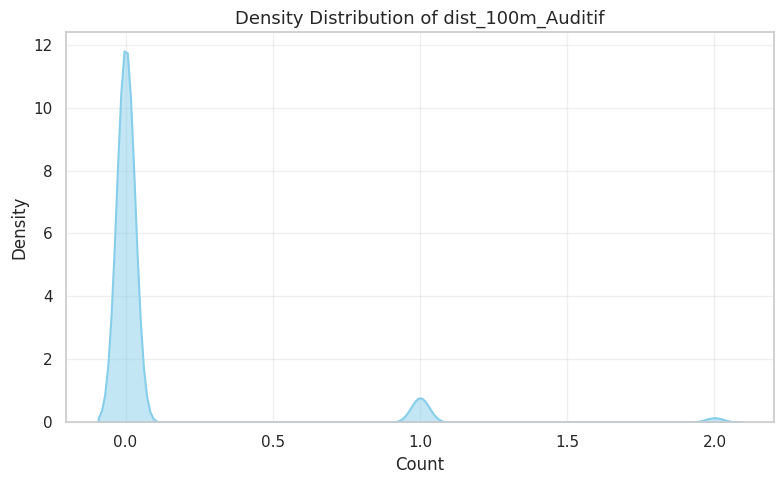

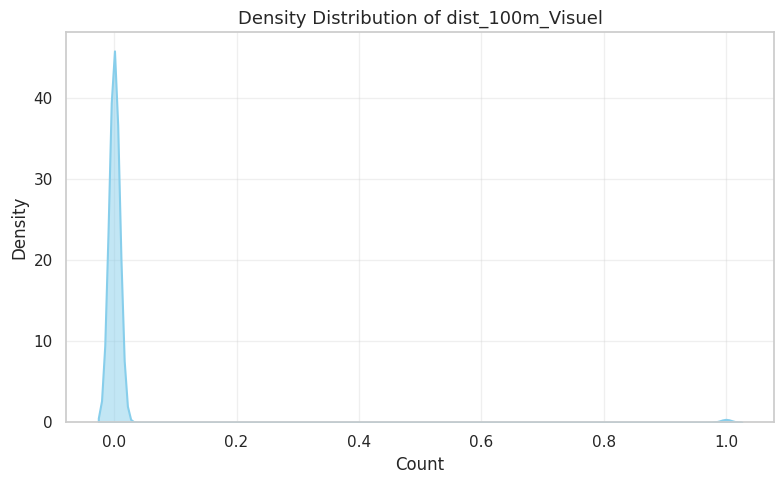

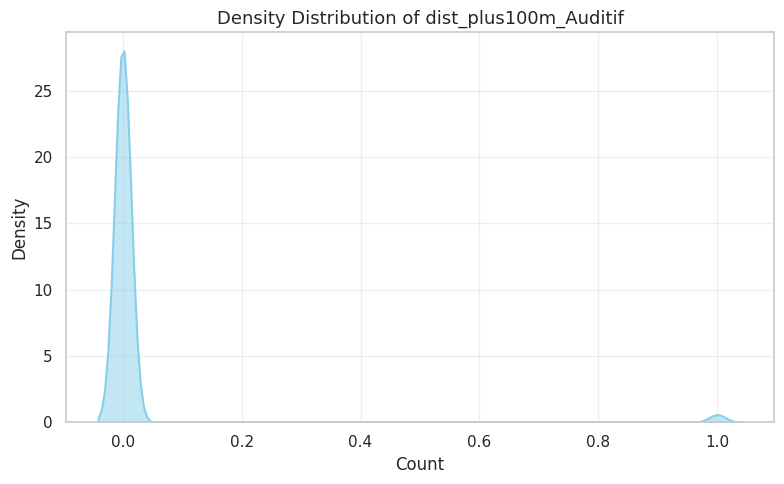

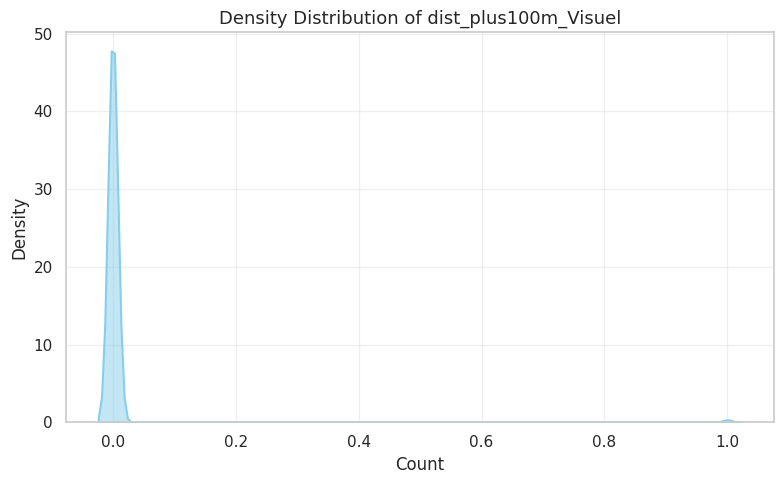

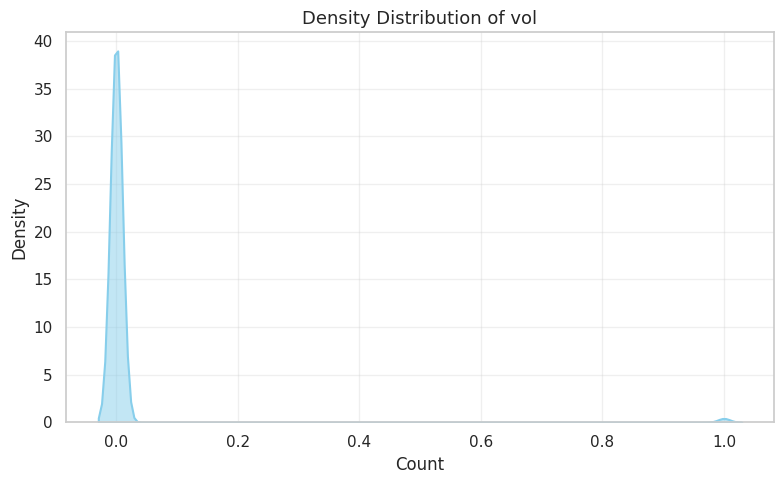

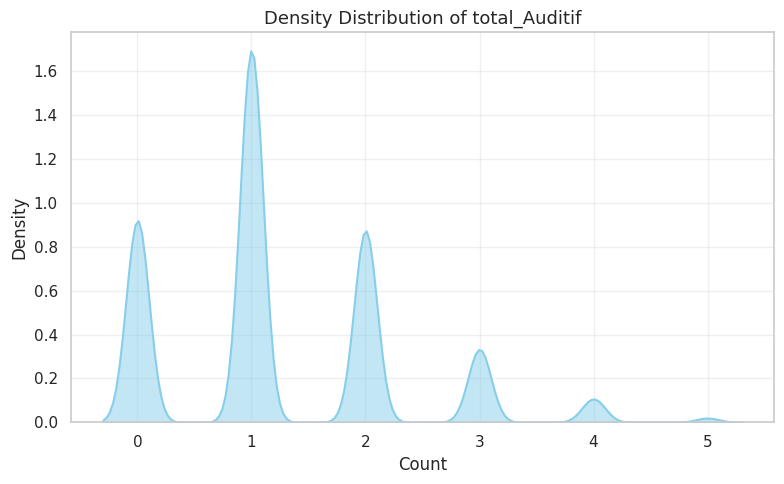

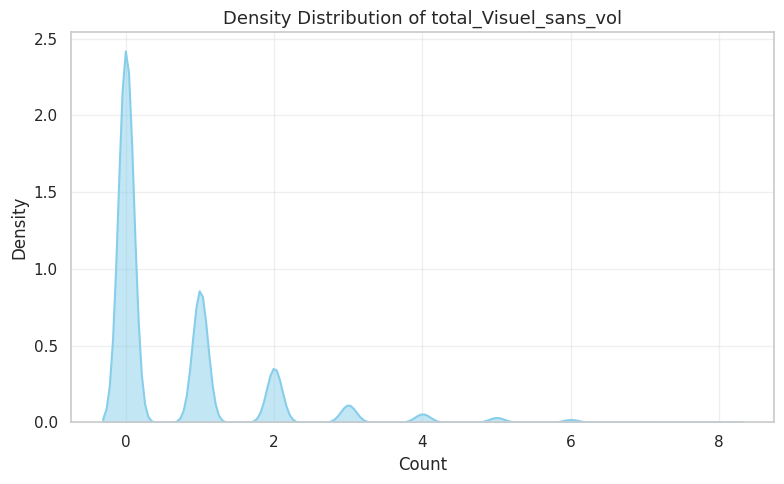

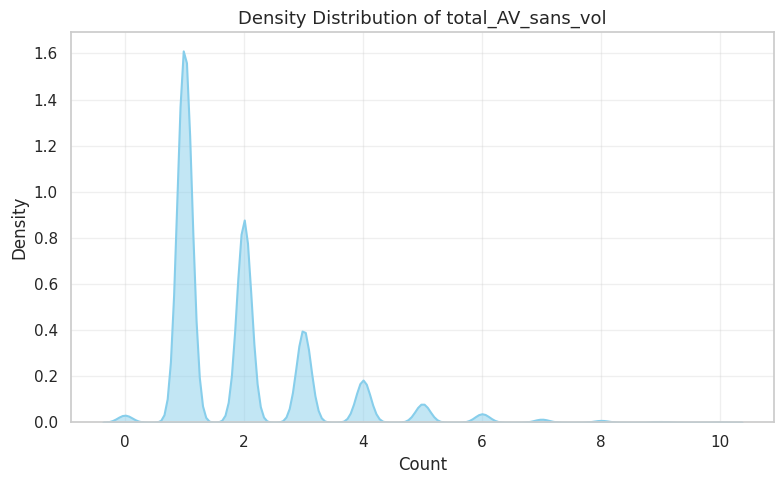

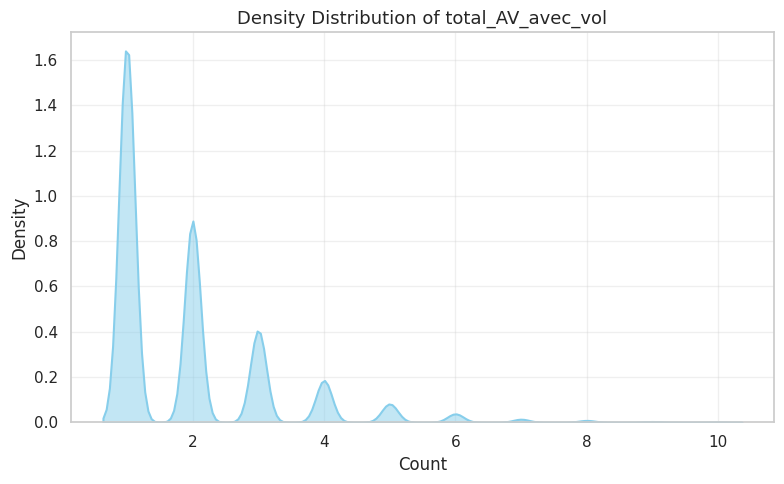

In [45]:
# %% [markdown]
# ## 各计数指标的密度图 / Density plots for each count variable
# 由于存在大量0值，因此箱线图效果不佳，改用密度图展示单个变量分布

# %%
import matplotlib.pyplot as plt
import seaborn as sns

# 设置 Seaborn 风格 / Set Seaborn style
sns.set(style="whitegrid")

# 遍历每一个计数列 / Loop through each count variable
for col in count_cols:
    plt.figure(figsize=(8, 5))
    
    # 绘制密度图 / Draw KDE plot for current variable
    sns.kdeplot(
        data=obs_data_no_outliers,
        x=col,
        fill=True,
        color='skyblue',
        alpha=0.5,
        linewidth=1.5
    )
    
    # 添加标题和标签 / Add titles and labels
    plt.title(f"Density Distribution of {col}", fontsize=13)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

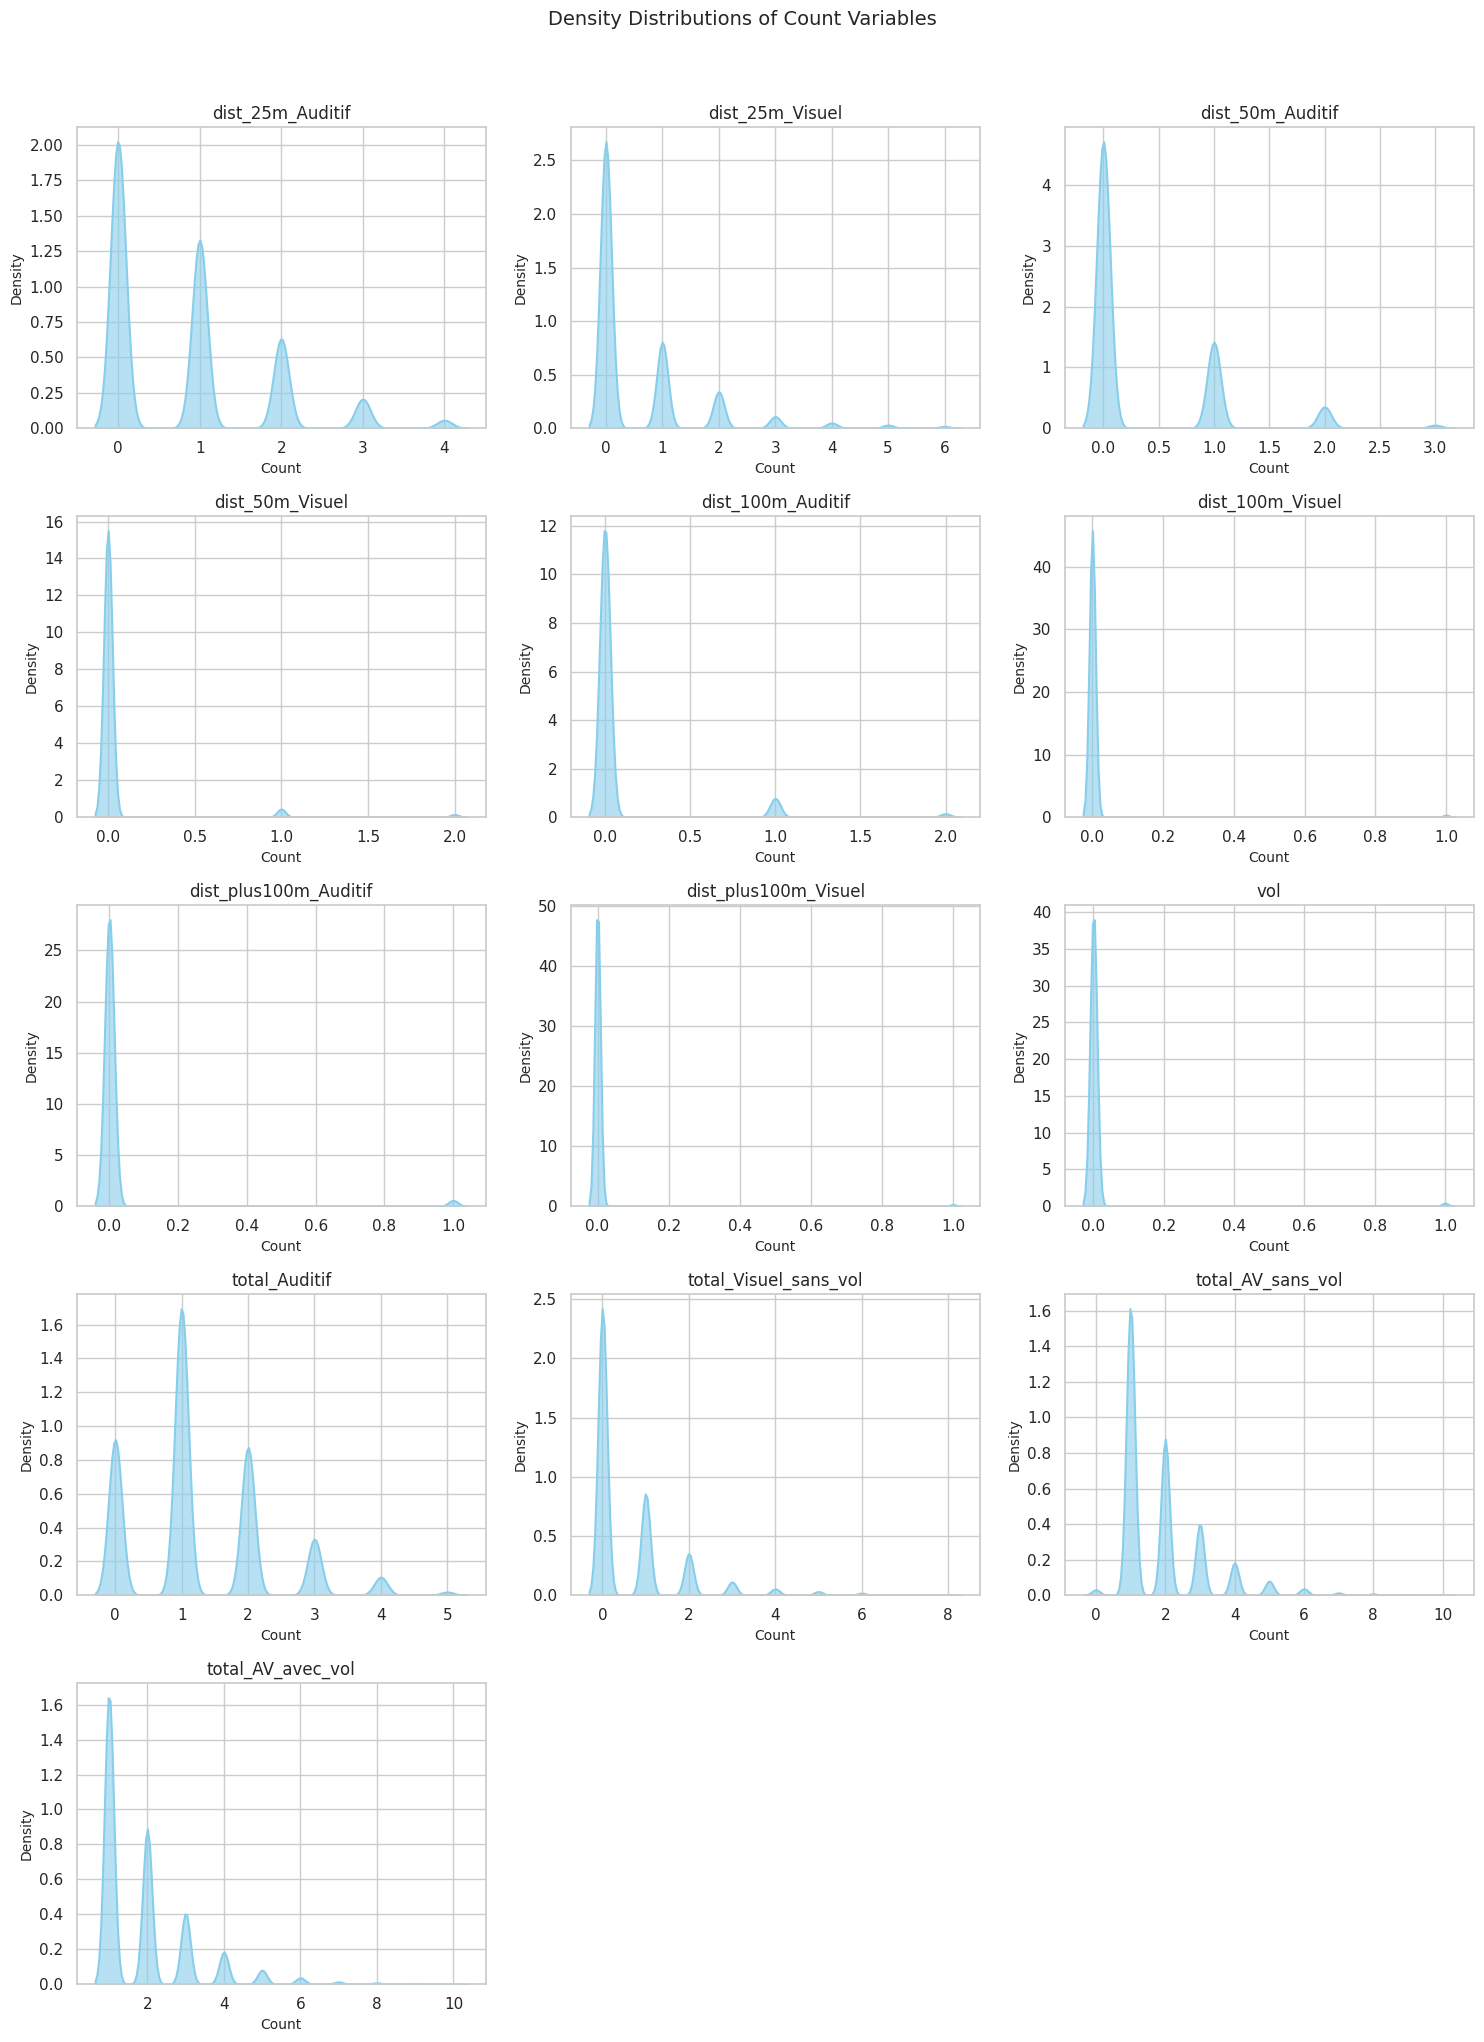

In [46]:
# %% [markdown]
# ## 各计数指标的密度图（多图布局）  
# ## Density plots for all count variables (grid layout)

# %%
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置绘图风格 / Set Seaborn style
sns.set(style="whitegrid")

# 计算网格行列数 / Compute number of rows and columns
n_cols = 3
n_rows = int(np.ceil(len(count_cols) / n_cols))

# 创建子图布局 / Create subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # 展平索引方便遍历 / Flatten axes for easy indexing

# 遍历所有计数列并绘图 / Loop through count columns and plot KDE
for i, col in enumerate(count_cols):
    sns.kdeplot(
        data=obs_data_no_outliers,
        x=col,
        fill=True,
        color='skyblue',
        alpha=0.6,
        linewidth=1.5,
        ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].set_xlabel("Count", fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)

# 隐藏空子图（如果列数不是3的倍数）/ Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# 全局标题与布局优化 / Adjust layout
plt.suptitle("Density Distributions of Count Variables", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

1️⃣ Observation Effort / 观测努力量
	•	指标定义：每年每条样线或总样线的观测次数（number of observations per year）
	•	选择理由：
	1.	能反映每年的调查活动强度，直接影响计数结果可靠性。
	2.	观测努力量变化会影响物种丰富度和数量的估计，如果不考虑努力量差异，可能误判生物多样性趋势。
	3.	易于量化，并且数据可直接从 obs_data 的 date 列和样线列计算。


2️⃣ Species Richness / 物种丰富度
	•	指标定义：每年被观测到的不同物种数量（unique species per year）
	•	选择理由：
	1.	物种丰富度是生态学常用的多样性指标，能反映生态系统状态和变化。
	2.	随着时间推移，物种数量的变化可以反映长期环境或保护措施的效果。
	3.	对应数据列为 ESPECE，可按年份聚合统计不同物种的数量。


3️⃣ Average Abundance / 平均数量（计数指标）
	•	指标定义：每年每条样线或每点位的平均鸟类数量（例如 total_AV_avec_vol 平均值）
	•	选择理由：
	1.	反映物种总体数量变化趋势，比单纯物种丰富度更能反映个体数量动态。
	2.	可以结合观测努力量进行标准化（如每次观测平均数量），减少不同年份观测差异影响。
	3.	数据列可选择总计列 total_AV_avec_vol 或分距离计数列综合计算。


总结

指标	数据来源	生态学意义	统计意义
Observation Effort / 观测努力量	Nom_transect, date	反映每年的调查活动强度	影响计数可靠性，可作为标准化因子
Species Richness / 物种丰富度	ESPECE	衡量生物多样性	可量化年度多样性变化
Average Abundance / 平均数量	total_AV_avec_vol	反映物种总体数量动态	可标准化、用于趋势分析




In [47]:
# # %% [markdown]
# # # 1️⃣ Observation Effort / 观测努力量
# # Compute annual observation effort with 95% confidence interval and visualize trend
# # 计算年度观测努力量，并估计95%置信区间，可视化年度趋势

# # %%
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.linear_model import LinearRegression

# # %% [markdown]
# # ## Prepare data / 数据准备

# # %%
# # Extract year from date / 提取年份
# obs_data['year'] = obs_data['date'].dt.year

# # %% [markdown]
# # ## Compute annual observation effort / 计算年度观测努力量

# # %%
# # Count number of observations per year / 每年观测记录数
# effort_by_year = obs_data.groupby('year').size().reset_index()
# effort_by_year.columns = ['year', 'obs_effort']
# effort_by_year

# # %% [markdown]
# # ## Compute 95% CI using bootstrap / 使用 bootstrap 估计 95% 置信区间

# # %%
# def bootstrap_ci(series, n_boot=1000, ci=95):
#     """Compute bootstrap confidence interval / 使用 bootstrap 计算置信区间"""
#     series = series.dropna()
#     boot_samples = [series.sample(frac=1, replace=True).count() for _ in range(n_boot)]
#     lower = np.percentile(boot_samples, (100-ci)/2)
#     upper = np.percentile(boot_samples, 100 - (100-ci)/2)
#     return lower, upper

# # Apply bootstrap CI for each year / 对每年计算置信区间
# ci_bounds = effort_by_year['year'].apply(lambda y: bootstrap_ci(obs_data[obs_data['year']==y].index))
# effort_by_year['ci_lower'] = [x[0] for x in ci_bounds]
# effort_by_year['ci_upper'] = [x[1] for x in ci_bounds]

# effort_by_year

# # %% [markdown]
# # ## Visualize trend / 可视化年度趋势

# # %%
# plt.figure(figsize=(12, 6))
# plt.fill_between(effort_by_year['year'], effort_by_year['ci_lower'], effort_by_year['ci_upper'], color='skyblue', alpha=0.3, label='95% CI / 置信区间')
# plt.plot(effort_by_year['year'], effort_by_year['obs_effort'], marker='o', color='blue', label='Observation Effort / 观测努力量')
# plt.xlabel("Year / 年份", fontsize=12)
# plt.ylabel("Number of Observations / 观测记录数", fontsize=12)
# plt.title("Annual Observation Effort / 年度观测努力量", fontsize=14)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # %% [markdown]
# # ## Trend analysis / 趋势分析

# # %%
# # Fit simple linear regression / 拟合简单线性回归
# X = effort_by_year['year'].values.reshape(-1, 1)
# y = effort_by_year['obs_effort'].values
# model = LinearRegression().fit(X, y)
# slope = model.coef_[0]
# intercept = model.intercept_
# print(f"Linear trend slope / 线性趋势斜率: {slope:.2f} observations per year / 每年观测记录数变化")

# # Plot trend line / 绘制线性趋势
# plt.figure(figsize=(12, 6))
# plt.fill_between(effort_by_year['year'], effort_by_year['ci_lower'], effort_by_year['ci_upper'], color='skyblue', alpha=0.3, label='95% CI / 置信区间')
# plt.plot(effort_by_year['year'], effort_by_year['obs_effort'], marker='o', color='blue', label='Observation Effort / 观测努力量')
# plt.plot(effort_by_year['year'], model.predict(X), color='red', linestyle='--', label='Linear Trend / 线性趋势')
# plt.xlabel("Year / 年份", fontsize=12)
# plt.ylabel("Number of Observations / 观测记录数", fontsize=12)
# plt.title("Annual Observation Effort with Trend / 年度观测努力量及趋势", fontsize=14)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

,rich,shan,simp,even,D1,D2,low_rich,high_rich,low_shan,high_shan,low_even,high_even,low_D1,high_D1,low_D2,high_D2,cov,low_cov,high_cov
year,,,,,,,,,,,,,,,,,,,
2014,56.930,3.101,0.060,0.768,22.238,16.561,51.000,62.0,3.032,3.161,0.749,0.788,20.748,23.591,15.664,17.486,0.554,0.441,0.662
2015,63.138,3.174,0.056,0.766,23.919,17.843,57.975,68.0,3.121,3.224,0.751,0.783,22.658,25.128,16.996,18.705,0.716,0.605,0.806
2016,69.688,3.209,0.054,0.756,24.761,18.385,62.975,75.0,3.152,3.264,0.741,0.775,23.382,26.149,17.532,19.235,0.797,0.692,0.873
2017,63.619,3.170,0.056,0.764,23.821,17.819,57.000,68.0,3.121,3.222,0.751,0.779,22.662,25.088,17.104,18.568,0.811,0.707,0.884
2018,66.294,3.153,0.058,0.752,23.403,17.324,61.000,71.0,3.103,3.201,0.738,0.767,22.262,24.552,16.684,18.022,0.878,0.785,0.935
2019,63.553,3.146,0.058,0.758,23.247,17.370,58.975,68.0,3.090,3.200,0.744,0.773,21.987,24.541,16.629,18.183,0.865,0.769,0.925
2020,63.868,3.145,0.057,0.757,23.217,17.446,59.000,67.0,3.094,3.197,0.745,0.771,22.057,24.458,16.821,18.173,0.851,0.753,0.915
2021,63.282,3.163,0.056,0.763,23.654,17.728,58.000,68.0,3.118,3.214,0.749,0.778,22.599,24.879,17.095,18.455,0.851,0.753,0.915
2022,62.445,3.157,0.057,0.764,23.506,17.686,57.000,66.0,3.100,3.212,0.749,0.781,22.203,24.836,16.885,18.584,0.851,0.753,0.915


Richness: slope=0.0900/year, p=0.7415
Shannon: slope=0.0005/year, p=0.8238
Evenness: slope=-0.0002/year, p=0.6957
Hill_q1: slope=0.0094/year, p=0.8585
Hill_q2: slope=-0.0014/year, p=0.9712
Coverage: slope=0.0196/year, p=0.0055


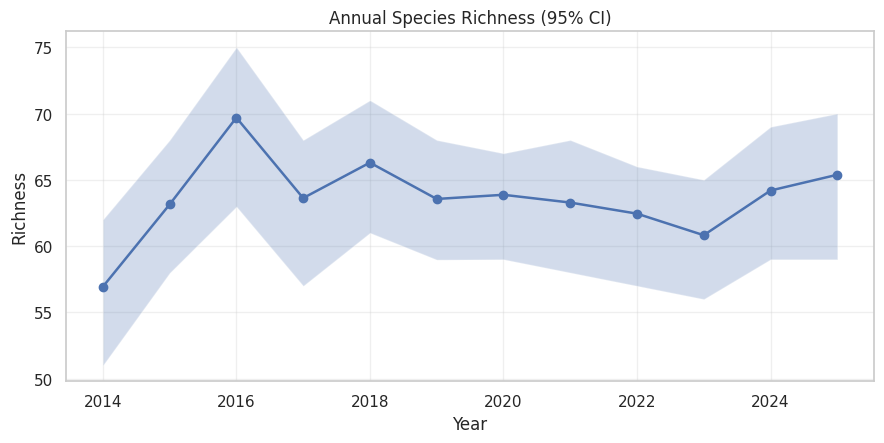

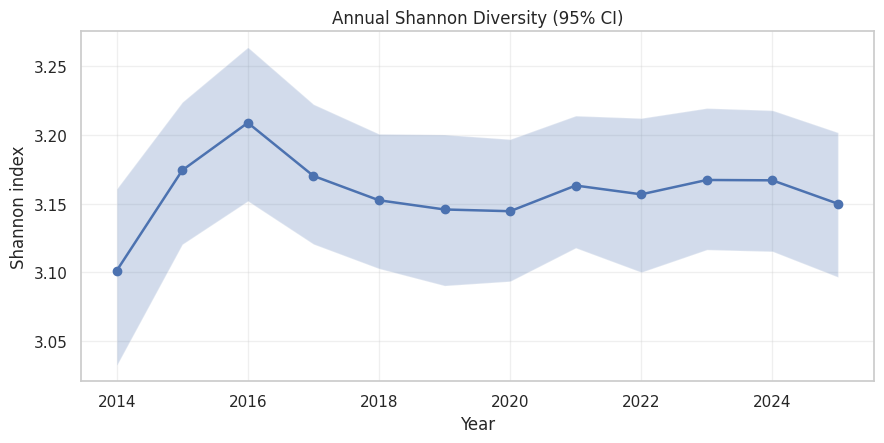

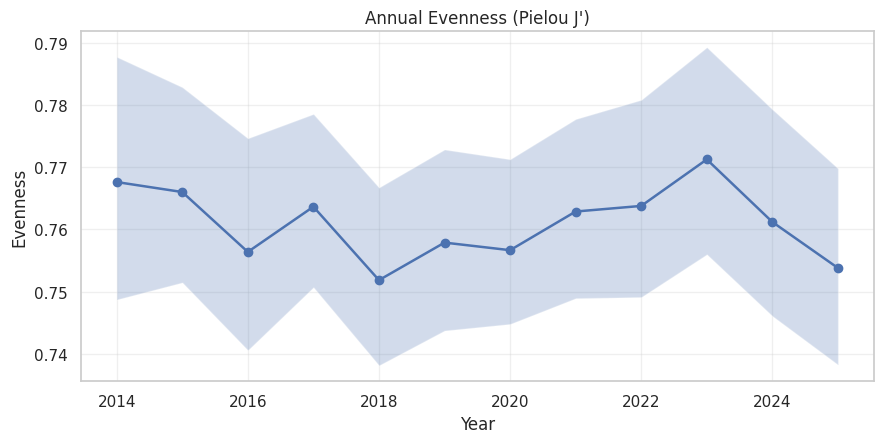

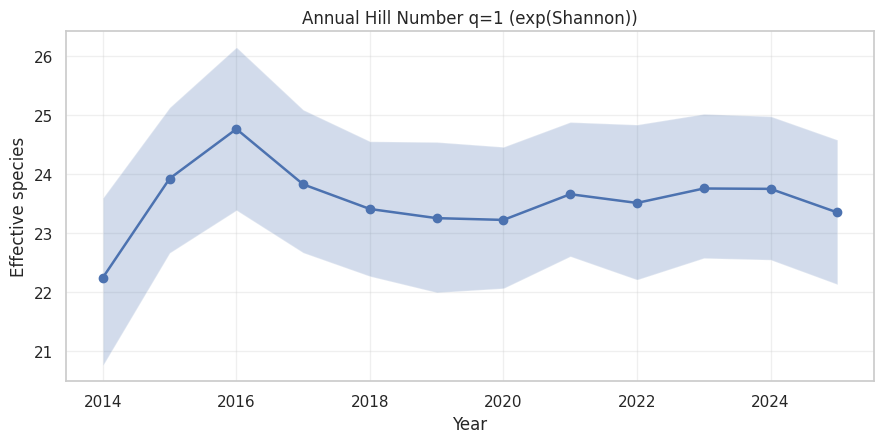

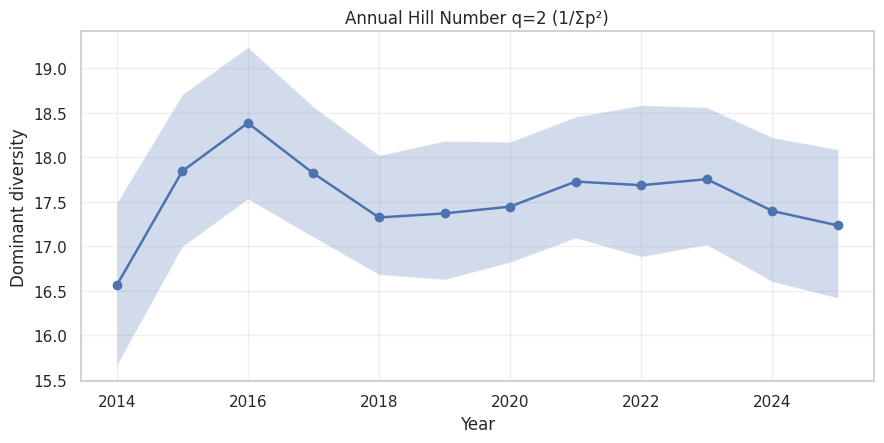

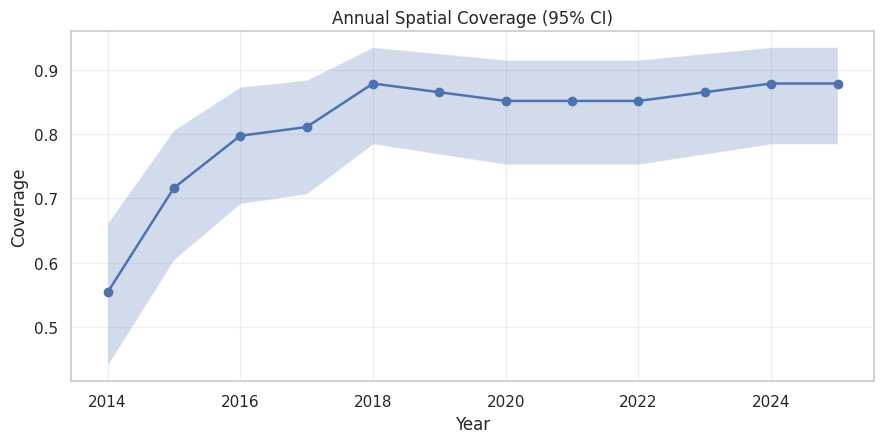

In [48]:
# === Extended Multi-Year Diversity Indicators (fast bootstrap + Hill numbers + Evenness) ===
# 改进内容：
#   - 在原有 Species_Richness、Shannon_Index、Spatial_Coverage 基础上，
#     新增三个生态学常用扩展指标：
#       (1) Evenness (Pielou's J') = Shannon / ln(Richness)
#       (2) Hill number D1 = exp(Shannon)
#       (3) Hill number D2 = 1 / sum(p_i^2)
#   - 仍基于 fast cluster bootstrap（样线×物种计数矩阵），保持高性能。
#   - 保留 95% CI 与线性趋势分析，输出更全面的表格和可视化。
#
#   列名：ESPECE, Nom_transect, date
#   数据：已预处理版本的 obs_data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm

COLS = {"date": "date", "species": "ESPECE", "transect": "Nom_transect"}

# --- 工具函数 ---
def shannon_from_counts(v):
    v = np.asarray(v, dtype=float)
    tot = v.sum()
    if tot <= 0:
        return np.nan
    p = v[v > 0] / tot
    return -np.sum(p * np.log(p))

def simpson_from_counts(v):
    v = np.asarray(v, dtype=float)
    tot = v.sum()
    if tot <= 0:
        return np.nan
    p = v[v > 0] / tot
    return np.sum(p ** 2)

def build_cluster_species_counts(df_year_group, cluster_col, species_col):
    """生成该年样线×物种计数矩阵"""
    if df_year_group.empty:
        return pd.DataFrame(dtype=int), [], []
    g = (
        df_year_group
        .dropna(subset=[cluster_col, species_col])
        .groupby([cluster_col, species_col], observed=True)
        .size()
        .unstack(fill_value=0)
    )
    return g.astype(int), g.index.to_list(), g.columns.to_list()

def fast_bootstrap_diversity_extended(counts_df, B=1000, random_state=42):
    """扩展版簇级自举：同时计算 Richness、Shannon、Simpson、Evenness、Hill numbers"""
    rng = np.random.default_rng(random_state)
    T = counts_df.shape[0]
    if T == 0:
        return {k: np.nan for k in ["rich","shan","simp","even","D1","D2",
                                    "low_rich","high_rich","low_shan","high_shan",
                                    "low_even","high_even","low_D1","high_D1","low_D2","high_D2"]}
    idx = np.arange(T)
    boots = {"rich": [], "shan": [], "simp": [], "even": [], "D1": [], "D2": []}

    def metrics_from_counts(v):
        S = (v > 0).sum()
        H = shannon_from_counts(v)
        P2 = simpson_from_counts(v)
        D1 = np.exp(H) if np.isfinite(H) else np.nan
        D2 = 1.0 / P2 if P2 > 0 else np.nan
        even = H / np.log(S) if S > 1 else np.nan
        return S, H, P2, D1, D2, even

    # 点估计
    v_point = counts_df.sum(axis=0).to_numpy(copy=False)
    S, H, P2, D1, D2, even = metrics_from_counts(v_point)

    # 自举
    for b in range(B):
        sampled = rng.choice(idx, size=T, replace=True)
        v = counts_df.iloc[sampled].sum(axis=0).to_numpy(copy=False)
        S, H, P2, D1, D2, even = metrics_from_counts(v)
        boots["rich"].append(S)
        boots["shan"].append(H)
        boots["simp"].append(P2)
        boots["D1"].append(D1)
        boots["D2"].append(D2)
        boots["even"].append(even)

    def ci(arr): return np.nanpercentile(arr, [2.5, 97.5]) if len(arr) else (np.nan, np.nan)

    result = {
        "rich": np.mean(boots["rich"]),
        "shan": np.mean(boots["shan"]),
        "simp": np.mean(boots["simp"]),
        "even": np.mean(boots["even"]),
        "D1": np.mean(boots["D1"]),
        "D2": np.mean(boots["D2"]),
        "low_rich": ci(boots["rich"])[0], "high_rich": ci(boots["rich"])[1],
        "low_shan": ci(boots["shan"])[0], "high_shan": ci(boots["shan"])[1],
        "low_even": ci(boots["even"])[0], "high_even": ci(boots["even"])[1],
        "low_D1": ci(boots["D1"])[0], "high_D1": ci(boots["D1"])[1],
        "low_D2": ci(boots["D2"])[0], "high_D2": ci(boots["D2"])[1],
    }
    return result

def wilson_ci(k, n, alpha=0.05):
    if n == 0:
        return (np.nan, np.nan)
    z = norm.ppf(1 - alpha/2)
    phat = k / n
    denom = 1 + z**2 / n
    center = (phat + z**2/(2*n)) / denom
    half = (z * np.sqrt(phat*(1-phat)/n + z**2/(4*n**2))) / denom
    return (max(0.0, center - half), min(1.0, center + half))

def linear_trend(y_series):
    y = y_series.dropna()
    if y.empty:
        return {"slope": np.nan, "pvalue": np.nan}
    X = sm.add_constant(y.index.values.astype(float))
    model = sm.OLS(y.values.astype(float), X).fit()
    return {"slope": float(model.params[1]), "pvalue": float(model.pvalues[1])}

# --- 主体计算 ---
YR_MIN, YR_MAX = 2014, 2025
df_raw = obs_data.copy()
df_raw["__date_parsed"] = pd.to_datetime(df_raw[COLS["date"]], errors="coerce")
df_raw["year"] = df_raw["__date_parsed"].dt.year
df_year = df_raw[df_raw["year"].between(YR_MIN, YR_MAX)].copy()

transect_universe = (
    df_year[COLS["transect"]].dropna().drop_duplicates().sort_values().tolist()
)
N_TRANSECTS_UNIVERSE = len(transect_universe)

records = []
for yr in range(YR_MIN, YR_MAX + 1):
    sub = df_year[df_year["year"] == yr]
    counts_df, clusters, species = build_cluster_species_counts(sub, COLS["transect"], COLS["species"])
    res = fast_bootstrap_diversity_extended(counts_df, B=1000, random_state=yr * 19 + 7)
    k, n = len(clusters), N_TRANSECTS_UNIVERSE
    cov_point = (k/n) if n>0 else np.nan
    lo, hi = wilson_ci(k, n)
    res.update({"year": yr, "cov": cov_point, "low_cov": lo, "high_cov": hi})
    records.append(res)

summary_ext = pd.DataFrame(records).set_index("year")
display(summary_ext.round(3))

# --- 趋势打印 ---
for key, label in [("rich","Richness"),("shan","Shannon"),("even","Evenness"),("D1","Hill_q1"),("D2","Hill_q2"),("cov","Coverage")]:
    tr = linear_trend(summary_ext[key])
    print(f"{label}: slope={tr['slope']:.4f}/year, p={tr['pvalue']:.4f}")

# --- 可视化 ---
def plot_indicator(df, col, low, high, title, ylabel):
    plt.figure(figsize=(9,4.6))
    plt.plot(df.index, df[col], marker='o', linewidth=1.8)
    plt.fill_between(df.index, df[low], df[high], alpha=0.25)
    plt.title(title)
    plt.xlabel("Year"); plt.ylabel(ylabel)
    plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

plot_indicator(summary_ext, "rich", "low_rich", "high_rich", "Annual Species Richness (95% CI)", "Richness")
plot_indicator(summary_ext, "shan", "low_shan", "high_shan", "Annual Shannon Diversity (95% CI)", "Shannon index")
plot_indicator(summary_ext, "even", "low_even", "high_even", "Annual Evenness (Pielou J')", "Evenness")
plot_indicator(summary_ext, "D1", "low_D1", "high_D1", "Annual Hill Number q=1 (exp(Shannon))", "Effective species")
plot_indicator(summary_ext, "D2", "low_D2", "high_D2", "Annual Hill Number q=2 (1/Σp²)", "Dominant diversity")
plot_indicator(summary_ext, "cov", "low_cov", "high_cov", "Annual Spatial Coverage (95% CI)", "Coverage")


In [49]:
# === Auto-interpretation Cell: significance table + bilingual narrative ===
# 功能：
#   1) 从 summary_ext（年度扩展指标表）读取各指标序列；
#   2) 用与前文一致的线性回归估计斜率和 p 值；
#   3) 判定显著性（默认 alpha=0.05，可调）与趋势方向（上升/下降/稳定）；
#   4) 生成英文 + 中文的“结果解读段落”，可直接用于报告；
#   5) 展示一个紧凑的显著性汇总表（指标、斜率、p 值、结论）。

import numpy as np
import pandas as pd
import statsmodels.api as sm
from textwrap import fill

# ------- 0) 基本检查 -------
required_cols = ["rich", "shan", "even", "D1", "D2", "cov"]
if "summary_ext" not in globals():
    raise RuntimeError("未找到变量 summary_ext。请先运行扩展指标计算的 cell，得到 summary_ext 表。")
missing = [c for c in required_cols if c not in summary_ext.columns]
if missing:
    raise RuntimeError(f"summary_ext 缺少必要列: {missing}")

# ------- 1) 工具函数：线性趋势与显著性判别 -------
def linear_trend(y: pd.Series):
    """
    对年度序列做线性回归： y ~ year
    返回 dict: slope, pvalue, intercept, n_years
    """
    y = y.dropna()
    if y.empty:
        return {"slope": np.nan, "pvalue": np.nan, "intercept": np.nan, "n_years": 0}
    X = sm.add_constant(y.index.values.astype(float))
    model = sm.OLS(y.values.astype(float), X).fit()
    slope = float(model.params[1])
    pval = float(model.pvalues[1]) if len(model.pvalues) > 1 else np.nan
    return {"slope": slope, "pvalue": pval, "intercept": float(model.params[0]), "n_years": int(y.shape[0])}

def classify_trend(slope, p, alpha=0.05, small=1e-6):
    """
    根据斜率与 p 值判定趋势：
      - p < alpha: 显著；slope>0 => 上升，slope<0 => 下降（允许 small 阈值避免数值抖动）
      - 否则：稳定（不显著）
    返回: ("up"/"down"/"stable", is_significant: bool)
    """
    if np.isnan(slope) or np.isnan(p):
        return "stable", False
    if p < alpha:
        if slope > small:
            return "up", True
        elif slope < -small:
            return "down", True
        else:
            # p<alpha 但斜率极小，仍视为“稳定”（极不常见；保守处理）
            return "stable", False
    else:
        return "stable", False

# ------- 2) 计算每个指标的趋势与显著性 -------
alpha = 0.05
labels_en = {
    "rich":"Species Richness",
    "shan":"Shannon diversity",
    "even":"Evenness (Pielou's J')",
    "D1":"Hill number q=1 (exp(Shannon))",
    "D2":"Hill number q=2 (1/Σp²)",
    "cov":"Spatial coverage"
}
labels_zh = {
    "rich":"物种丰富度",
    "shan":"香农多样性",
    "even":"群落均匀度（Pielou J′）",
    "D1":"Hill 数 q=1（exp(Shannon)）",
    "D2":"Hill 数 q=2（1/Σp²）",
    "cov":"空间覆盖率"
}

rows = []
for key in required_cols:
    tr = linear_trend(summary_ext[key])
    direction, significant = classify_trend(tr["slope"], tr["pvalue"], alpha=alpha)
    rows.append({
        "indicator": key,
        "name_en": labels_en[key],
        "name_zh": labels_zh[key],
        "slope_per_year": tr["slope"],
        "p_value": tr["pvalue"],
        "significant": significant,
        "direction": direction
    })

sig_df = pd.DataFrame(rows).set_index("indicator")
display(sig_df.loc[:, ["name_en","name_zh","slope_per_year","p_value","significant","direction"]].round(4))

# ------- 3) 自动撰写 英文 + 中文 结果解读段落 -------
def dir_to_text_en(direction):
    return {"up":"increased", "down":"decreased", "stable":"remained stable"}.get(direction,"remained stable")

def dir_to_text_zh(direction):
    return {"up":"上升", "down":"下降", "stable":"稳定"}.get(direction,"稳定")

def fmt_slope(s):
    return f"{s:.4f}"

def fmt_p(p):
    return f"{p:.4f}"

# 英文段落构建
parts_en = []
parts_en.append("Temporal trends in biodiversity indicators (2014–2025):")
stable_en = []
change_en  = []
for key, row in sig_df.iterrows():
    name = row["name_en"]
    slope = fmt_slope(row["slope_per_year"])
    p = fmt_p(row["p_value"])
    if row["significant"]:
        change_en.append(f"{name} {dir_to_text_en(row['direction'])} significantly (slope = {slope} per year, p = {p}).")
    else:
        stable_en.append(f"{name} remained statistically stable (slope = {slope} per year, p = {p}).")

if change_en:
    parts_en.append(" ".join(change_en))
if stable_en:
    parts_en.append(" ".join(stable_en))

# 强调 coverage 与多样性之间的对照（若 coverage 显著）
if sig_df.loc["cov", "significant"]:
    parts_en.append("In contrast to stable diversity metrics, spatial coverage increased significantly, indicating a broader and more representative monitoring network over time.")

# 中文段落构建
parts_zh = []
parts_zh.append("2014–2025 年多样性指标的时间趋势如下：")
stable_zh = []
change_zh = []
for key, row in sig_df.iterrows():
    name = row["name_zh"]
    slope = fmt_slope(row["slope_per_year"])
    p = fmt_p(row["p_value"])
    if row["significant"]:
        change_zh.append(f"{name}{dir_to_text_zh(row['direction'])}，具有统计学显著性（斜率 {slope}/年，p = {p}）。")
    else:
        stable_zh.append(f"{name}整体保持稳定（斜率 {slope}/年，p = {p}）。")

if change_zh:
    parts_zh.append("".join(change_zh))
if stable_zh:
    parts_zh.append("".join(stable_zh))

if sig_df.loc["cov", "significant"]:
    parts_zh.append("与多样性指标的稳定性相对，空间覆盖率显著上升，说明监测网络逐步扩展、代表性增强。")

# 输出段落（自动换行，便于阅读/复制）
print("\n=== Interpretation (EN) ===")
print(fill(" ".join(parts_en), width=100))
print("\n=== 结果解读（中文） ===")
print(fill("".join(parts_zh), width=50))

# ------- 4) 简短的结论建议（可选） -------
conclusion_en = (
    "Overall, the avian community appears ecologically stable across the study period, "
    "with no measurable loss in diversity, while the monitoring design has improved due to increased spatial coverage."
)
conclusion_zh = (
    "总体而言，研究期内鸟类群落表现为生态稳定：多样性未检测到显著下降，"
    "同时空间覆盖率的提升表明监测设计逐步完善、代表性增强。"
)

print("\n=== Conclusion (EN) ===")
print(fill(conclusion_en, width=100))
print("\n=== 结论（中文） ===")
print(fill(conclusion_zh, width=50))


,name_en,name_zh,slope_per_year,p_value,significant,direction
indicator,,,,,,
rich,Species Richness,物种丰富度,0.0900,0.7415,False,stable
shan,Shannon diversity,香农多样性,0.0005,0.8238,False,stable
even,Evenness (Pielou's J'),群落均匀度（Pielou J′）,-0.0002,0.6957,False,stable
D1,Hill number q=1 (exp(Shannon)),Hill 数 q=1（exp(Shannon)）,0.0094,0.8585,False,stable
D2,Hill number q=2 (1/Σp²),Hill 数 q=2（1/Σp²）,-0.0014,0.9712,False,stable
cov,Spatial coverage,空间覆盖率,0.0196,0.0055,True,up



=== Interpretation (EN) ===
Temporal trends in biodiversity indicators (2014–2025): Spatial coverage increased significantly
(slope = 0.0196 per year, p = 0.0055). Species Richness remained statistically stable (slope =
0.0900 per year, p = 0.7415). Shannon diversity remained statistically stable (slope = 0.0005 per
year, p = 0.8238). Evenness (Pielou's J') remained statistically stable (slope = -0.0002 per year, p
= 0.6957). Hill number q=1 (exp(Shannon)) remained statistically stable (slope = 0.0094 per year, p
= 0.8585). Hill number q=2 (1/Σp²) remained statistically stable (slope = -0.0014 per year, p =
0.9712). In contrast to stable diversity metrics, spatial coverage increased significantly,
indicating a broader and more representative monitoring network over time.

=== 结果解读（中文） ===
2014–2025 年多样性指标的时间趋势如下：空间覆盖率上升，具有统计学显著性（斜率
0.0196/年，p = 0.0055）。物种丰富度整体保持稳定（斜率 0.0900/年，p =
0.7415）。香农多样性整体保持稳定（斜率 0.0005/年，p =
0.8238）。群落均匀度（Pielou J′）整体保持稳定（斜率 -0.0002/年，p =
0.6957）。Hill 数 q=1（exp

[Info] No explicit effort column found. Using number of unique survey dates per transect-year as effort.
[Dispersion] Pearson chi2/df = 17.282 → Use Negative Binomial
[Model] Using Negative Binomial (alpha estimated) GLM with offset(log(effort)).


/home/chan/.local/lib/python3.10/site-packages/statsmodels/base/_prediction_inference.py:782: UserWarning: using default log-link in get_prediction
  warnings.warn("using default log-link in get_prediction")


,rate_pred,rate_ci_low,rate_ci_high
year,,,
2014,68.4576,62.7890,74.6379
2015,80.1862,74.3556,86.4741
2016,94.0440,87.6047,100.9565
2017,77.2340,71.9483,82.9080
2018,74.8019,69.8722,80.0793
2019,76.5846,71.4982,82.0328
2020,86.5511,80.7621,92.7551
2021,84.1589,78.5570,90.1602
2022,86.3149,80.5706,92.4688


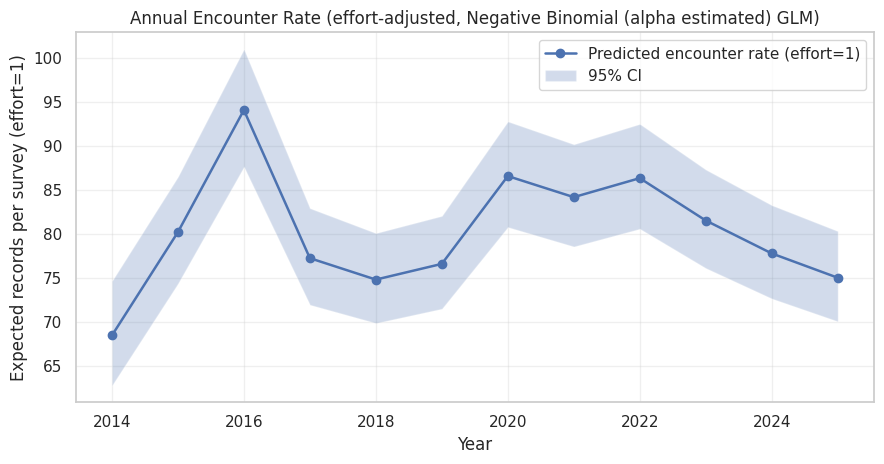

=== Trend on marginal annual means ===
Slope (per year) = 0.1611, p = 0.7918

[Notes]
1) Encounter rate is modeled with offset(log(effort)) for proper effort adjustment.
2) If overdispersion is present (Pearson chi2/df > 1.5), Negative Binomial is used; otherwise Poisson is adequate.
3) Optional covariates (e.g., habitat, weather) are supported and help reduce confounding.


In [50]:
# === Effort-adjusted Encounter Rate via GLM/NegBin (annual estimates + 95% CI) ===
# 目的（“加固报告”模块）：
#   - 构造“努力校正后的遇见率（encounter rate）”年度指标
#   - 使用 GLM（Poisson；若过度离散则自动切换 Negative Binomial）
#   - 模型： count ~ C(year) + [可选协变量] + offset(log(effort))
#   - 输出 2014–2025 各年的“标准努力(=1)”预测值及 95% CI，并绘图
#
# 兼容性：
#   - 仅依赖 obs_data（已存在的数据表）
#   - 必要列：date, Nom_transect, ESPECE
#   - 可选列：habitat_type, weather_code, 以及任一“effort”数值列（见 CAND_EFFORT_COLS）
#   - 若无显式 effort 列，则回退为：effort = 同一 transect-年 的“独立调查日数”（unique date 数）
#
# 统计解释：
#   - 通过 offset(log(effort)) 在模型内做努力校正，优于先除以 effort 再回归（避免方差扭曲）
#   - 以 transect-year 为分析单元，减少行级相关性
#
# 输出：
#   - annual_encounter（DataFrame）：year, rate_pred, rate_ci_low, rate_ci_high
#   - 过度离散诊断、选择的家族（Poisson or NegBin）
#   - 图：年度预测 + 95% CI

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ---------------- 0) 基本参数与列名 ----------------
YR_MIN, YR_MAX = 2014, 2025
COL_DATE = "date"
COL_TRANSECT = "Nom_transect"
COL_SPECIES = "ESPECE"

# 可能存在的 effort 列候选（如距离/时长/总努力等）
CAND_EFFORT_COLS = [
    "effort_km","effort_h","Effort","effort","distance","duration",
    "km","hours","len_km","time_h","Longueur_km","Duree_h"
]

# ---------------- 1) 构造 transect-year 聚合表：count 与 effort ----------------
df0 = obs_data.copy()
df0["__date_parsed"] = pd.to_datetime(df0[COL_DATE], errors="coerce")
df0["year"] = df0["__date_parsed"].dt.year
df0 = df0[df0["year"].between(YR_MIN, YR_MAX)].copy()

# count：transect-year 的记录条数（每行视为一次记录）
grp_keys = [COL_TRANSECT, "year"]
agg = df0.groupby(grp_keys, dropna=True).size().rename("count").reset_index()

# effort：优先使用显式 effort 列（数值型，transect-year 求和）；否则回退为“独立调查日数”
effort_col_found = None
for c in CAND_EFFORT_COLS:
    if c in df0.columns and pd.api.types.is_numeric_dtype(df0[c]):
        effort_col_found = c
        break

if effort_col_found is not None:
    eff_tbl = (
        df0.groupby(grp_keys, dropna=True)[effort_col_found]
           .sum(min_count=1)
           .rename("effort")
           .reset_index()
    )
    print(f"[Info] Using explicit effort column: {effort_col_found} (summed over transect-year).")
else:
    eff_tbl = (
        df0.dropna(subset=[COL_TRANSECT, "__date_parsed"])
           .groupby(grp_keys)["__date_parsed"]
           .nunique()
           .rename("effort")
           .reset_index()
    )
    print("[Info] No explicit effort column found. Using number of unique survey dates per transect-year as effort.")

ty = pd.merge(agg, eff_tbl, on=grp_keys, how="outer")
# 保护：effort<=0 或缺失 → 设为 1，避免 log(0)
ty["effort"] = ty["effort"].fillna(0)
ty.loc[ty["effort"] <= 0, "effort"] = 1.0

# ---------------- 1.1 可选：加入协变量（如存在） ----------------
# habitat：众数；weather：均值。可按需要替换为你前序清洗的更权威口径。
covars = []
if "habitat_type" in df0.columns:
    mode_hab = (
        df0.dropna(subset=[COL_TRANSECT, "year","habitat_type"])
           .groupby(grp_keys)["habitat_type"]
           .agg(lambda x: x.mode().iat[0] if len(x.mode()) else np.nan)
           .reset_index()
           .rename(columns={"habitat_type":"habitat_type_mode"})
    )
    ty = ty.merge(mode_hab, on=grp_keys, how="left")
    covars.append("C(habitat_type_mode)")

if "weather_code" in df0.columns and pd.api.types.is_numeric_dtype(df0["weather_code"]):
    wmean = (
        df0.dropna(subset=[COL_TRANSECT, "year","weather_code"])
           .groupby(grp_keys)["weather_code"].mean().reset_index()
           .rename(columns={"weather_code":"weather_mean"})
    )
    ty = ty.merge(wmean, on=grp_keys, how="left")
    covars.append("weather_mean")

# ---------------- 2) 模型拟合：Poisson → NegBin（自动过度离散检测） ----------------
rhs_terms = ["C(year)"] + covars
formula = "count ~ " + " + ".join(rhs_terms)

# Poisson
poisson_model = smf.glm(
    formula=formula,
    data=ty,
    family=sm.families.Poisson(),
    offset=np.log(ty["effort"].astype(float))
).fit()

# 过度离散诊断（Pearson χ²/df）
pearson_chi2 = poisson_model.pearson_chi2
df_resid = poisson_model.df_resid
dispersion = pearson_chi2 / df_resid if df_resid > 0 else np.nan
use_negbin = bool(dispersion > 1.5)  # 阈值可根据需要调整

print(f"[Dispersion] Pearson chi2/df = {dispersion:.3f} → "
      f"{'Use Negative Binomial' if use_negbin else 'Poisson seems adequate'}")

if use_negbin:
    # NegativeBinomial 在 statsmodels 中是独立模型，支持 from_formula + offset
    model = sm.NegativeBinomial.from_formula(
        formula=formula,
        data=ty,
        offset=np.log(ty["effort"].astype(float))
    ).fit(disp=0)  # disp=0 可选，避免冗余输出
    family_name = "Negative Binomial (alpha estimated)"
else:
    model = poisson_model
    family_name = "Poisson"

print(f"[Model] Using {family_name} GLM with offset(log(effort)).")

# ---------------- 3) 年度边际均值（effort=1）预测 + 95% CI ----------------
pred_df = pd.DataFrame({"year": list(range(YR_MIN, YR_MAX+1))})
pred_df["effort"] = 1.0  # 标准努力：每年“单次调查”的期望记录数

# 协变量取参考值（habitat 取众数，weather 取均值）
if "habitat_type_mode" in ty.columns:
    ref_hab = ty["habitat_type_mode"].mode().iat[0] if ty["habitat_type_mode"].notna().any() else None
    pred_df["habitat_type_mode"] = ref_hab
if "weather_mean" in ty.columns:
    pred_df["weather_mean"] = ty["weather_mean"].mean()

# --- 替换从 pred_res 开始的代码 ---
pred_res = model.get_prediction(pred_df.assign(offset=np.log(pred_df["effort"])))
pred_summary = pred_res.summary_frame(alpha=0.05)

# 使用通用列名（兼容 Poisson GLM 和 Negative Binomial）
annual_encounter = pd.DataFrame({
    "year": pred_df["year"].values,
    "rate_pred": pred_summary["predicted"].values,
    "rate_ci_low": pred_summary["ci_lower"].values,
    "rate_ci_high": pred_summary["ci_upper"].values
}).set_index("year")

display(annual_encounter.round(4))

# ---------------- 4) 可视化：年度预测 + 95% CI ----------------
plt.figure(figsize=(9,4.8))
plt.plot(annual_encounter.index, annual_encounter["rate_pred"], marker="o", linewidth=1.8,
         label="Predicted encounter rate (effort=1)")
plt.fill_between(annual_encounter.index,
                 annual_encounter["rate_ci_low"],
                 annual_encounter["rate_ci_high"],
                 alpha=0.25, label="95% CI")
plt.title(f"Annual Encounter Rate (effort-adjusted, {family_name} GLM)")
plt.xlabel("Year"); plt.ylabel("Expected records per survey (effort=1)")
plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# ---------------- 5) 年度边际均值的线性趋势（仅作量化参考） ----------------
lin_X = sm.add_constant(annual_encounter.index.values.astype(float))
lin_mod = sm.OLS(annual_encounter["rate_pred"].values.astype(float), lin_X).fit()
print("=== Trend on marginal annual means ===")
print(f"Slope (per year) = {lin_mod.params[1]:.4f}, p = {lin_mod.pvalues[1]:.4f}")

print("\n[Notes]")
print("1) Encounter rate is modeled with offset(log(effort)) for proper effort adjustment.")
print("2) If overdispersion is present (Pearson chi2/df > 1.5), Negative Binomial is used; otherwise Poisson is adequate.")
print("3) Optional covariates (e.g., habitat, weather) are supported and help reduce confounding.")


# The effort-adjusted encounter rate exhibited substantial year-to-year variability, with a clear non-linear pattern rather than a monotonic trend. Encounter rates increased sharply from 2014 to 2016, peaked around 2016, and subsequently declined and stabilized after 2018.
# A simple linear trend (slope = 0.16/year, p = 0.79) was not significant, suggesting that the variation is better described by a short-term fluctuation rather than a sustained increase or decrease.
# This pattern likely reflects variations in survey effort efficiency, weather, or local population dynamics rather than directional ecological change.)


In [51]:
! pip install pygam

Defaulting to user installation because normal site-packages is not writeable


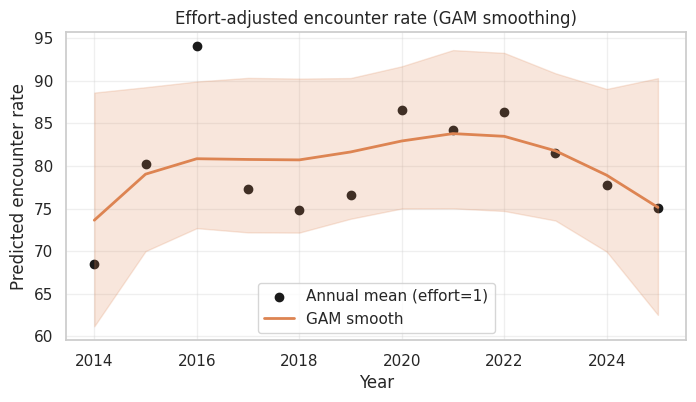

In [52]:
from pygam import PoissonGAM, s

X = annual_encounter.index.values.reshape(-1, 1)
y = annual_encounter['rate_pred'].values
gam = PoissonGAM(s(0, n_splines=6)).fit(X, y)

plt.figure(figsize=(8,4))
plt.scatter(X, y, color='k', label='Annual mean (effort=1)')
plt.plot(X, gam.predict(X), color='C1', linewidth=2, label='GAM smooth')
plt.fill_between(X.flatten(),
                 gam.confidence_intervals(X)[:,0],
                 gam.confidence_intervals(X)[:,1],
                 color='C1', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Predicted encounter rate')
plt.title('Effort-adjusted encounter rate (GAM smoothing)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# The effort-adjusted encounter rate displayed a distinct non-linear temporal pattern between 2014 and 2025.
# Encounter rates increased sharply in the early years (2014–2016), plateaued during 2017–2021, and showed a slight decline afterwards.
# The GAM smoothing highlights this “rise–stabilization–decline” trajectory, with broad confidence intervals in recent years indicating higher uncertainty.
# This suggests that while survey efficiency and spatial coverage initially improved, ecological or operational factors may have contributed to a mild reduction in observed encounter rates in the most recent period.

In [ ]:
###